In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os
import numpy as np

# Specify the file path
file_path = r'C:\Users\Qazi Fabia Hoq\OneDrive\Documents\GitHub\SalesDataAnalysis_FMCG\retaildata.csv'



# Read the CSV file
df = pd.read_csv(file_path)


# Display the head of the DataFrame
display(df.head())

,order_id,dt_order,product_id,segment,category,sub_category,product,mrp_inr,cost_per_unit,store_id,...,state,city,city_synonym,population,population_group,quantity,sales,cost_price,discount,profit
0,1,2022-03-26,10024,Foods,Beverages,Tea,Sunbean Darjeeling Tea,90,57,298,...,Kerala,Kozhikode,CCJ,1010000,Tier 2 Cities,574,51660,32931,0.00,18729
1,2,2021-03-14,10054,Household,Cleaning,Dishwash Liquids,Pril Power Dishwash Liquid,70,46,313,...,Andhra Pradesh,Guntur,GTR,688000,Tier 2 Cities,708,49560,32866,0.12,10746
2,3,2021-06-23,10105,Personal Care,Skin Care,Moisturizers,Cetaphil Moisturizing Cream,220,176,207,...,Haryana,Rohtak,RHT,890000,Tier 3 Cities,663,145860,116900,0.10,14374
3,4,2019-09-27,10047,Household,Cleaning,Dishwash Liquids,Vim Bar,10,8,264,...,Rajasthan,Jodhpur,JDH,1150000,Tier 3 Cities,110,1100,832,0.10,158
4,5,2023-03-05,10143,Personal Care,Hair Care,Hair Color,Wella Color Charm Demi-Permanent Hair Color,270,184,373,...,Uttarakhand,Dehradun,DED,578000,Tier 2 Cities,876,236520,161289,0.00,75231


In [2]:
# Group the data by product and sum the sales column
total_sales_per_product = df.groupby('product')['sales'].sum().reset_index()

# Sort the results in descending order of total sales
total_sales_per_product = total_sales_per_product.sort_values(by='sales', ascending=False)

# Display the total sales revenue for each product
print(total_sales_per_product)


                                               product     sales
52   Garnier Olia Bold Ammonia Free Permanent Hair ...  11573260
84                      L'Oréal Paris Feria Hair Color  11268160
133            Revlon Total Color Permanent Hair Color  11136000
114         Neutrogena Ultra Sheer Dry-Touch Sunscreen  11127900
83           L'Oréal Paris Excellence Crème Hair Color  10369450
..                                                 ...       ...
164       Sunfeast Mom's Magic Cashew & Almond Cookies    836250
16                           Bingo! Tedhe Medhe Masala    624640
17                       Bingo! Yumitos Original Style    581130
163                               Sunfeast Marie Light    417380
171                                            Vim Bar    250160

[185 rows x 2 columns]


# Retail Sales Analysis Questions

#### Questions we are asking: 

What is the distribution of sales by category?

How do sales vary over time?

Which stores have the highest sales revenue?

What is the average sales price of top 20 selling products?

How effective are discounts in driving sales?

What is the profitability of top 20 selling product?

What is the profitability of bottom 20 selling product?

How do sales vary across different regions?

What is the average sales per product category?

How does the quantity sold vary for the top 20 selling products?



#### KPI Analysis:
Product Sales Growth Rate: How has the sales growth rate changed from the previous period to the current period for each product category?

Category Market Share: What is the market share of each product category based on sales revenue?

Profit Margin per Product: What is the profit margin for each product, calculated as the percentage of profit from the sales revenue?

Customer Reach Index: How many orders were placed for each product, and what percentage of total orders does this represent?

Customer Acquisition Cost: How much does it cost to acquire a new customer for each product category, based on total marketing and acquisition expenses divided by the number of new customers acquired?


# What is the distribution of sales by category?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\3365577572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='sales', data=sales_by_category, palette='viridis')


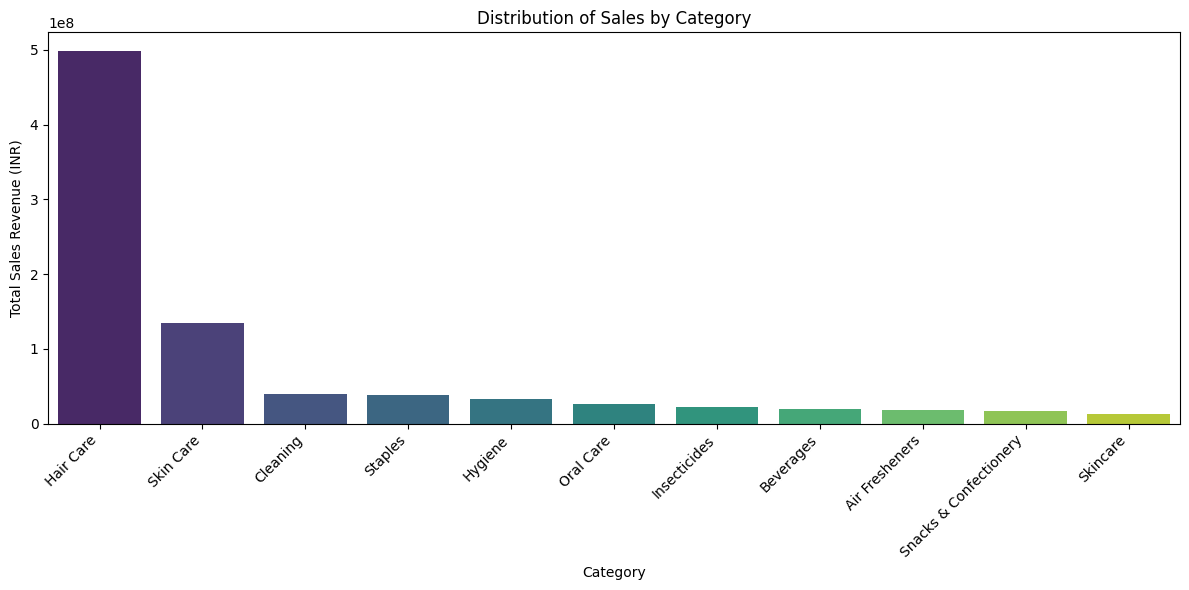

In [3]:
# Calculate total sales revenue for each category
sales_by_category = df.groupby('category')['sales'].sum().sort_values(ascending=False).reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='sales', data=sales_by_category, palette='viridis')
plt.title('Distribution of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# How do sales vary over time?

### Total Sales Over Time (By Year)

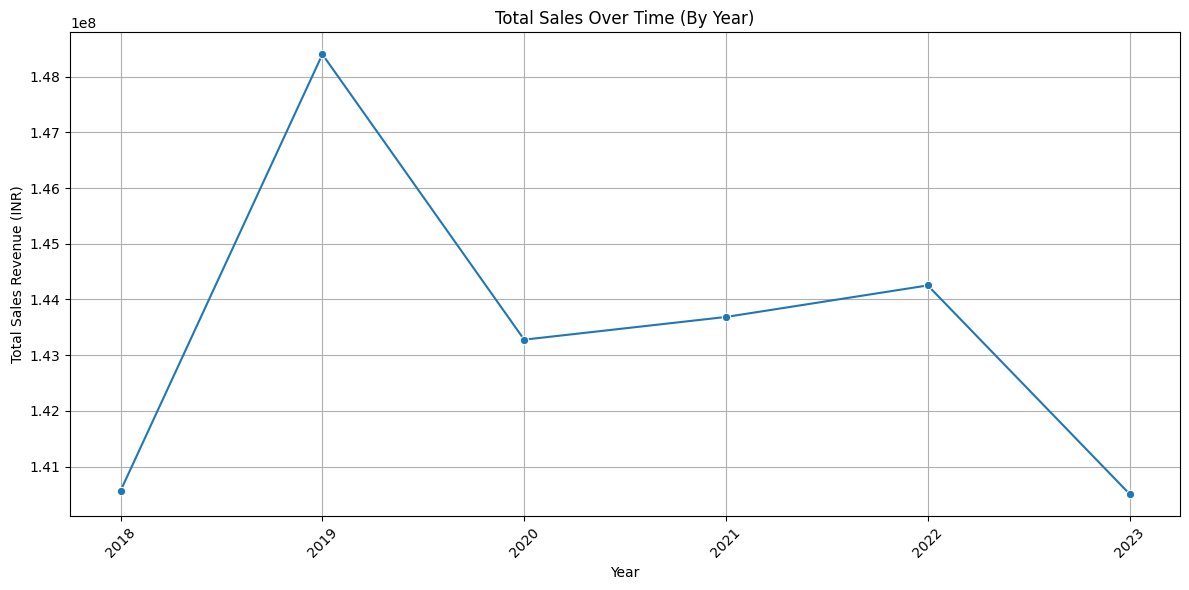

In [4]:
# Convert 'dt_order' column to datetime
df['dt_order'] = pd.to_datetime(df['dt_order'])

# Extract year from 'dt_order' column
df['year'] = df['dt_order'].dt.year

# Group data by year and calculate total sales for each year
yearly_sales = df.groupby('year')['sales'].sum().reset_index()

# Plot the total sales over time using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sales', data=yearly_sales, marker='o')
plt.title('Total Sales Over Time (By Year)')
plt.xlabel('Year')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


### Total Sales Over Time (By Month)

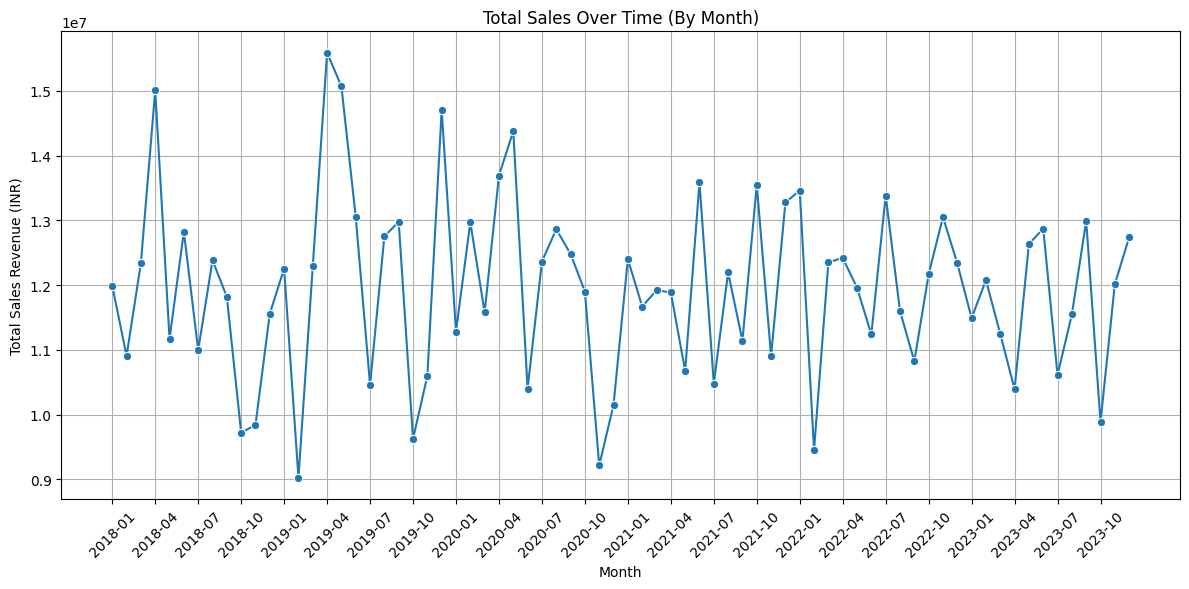

In [5]:
# Convert 'dt_order' column to datetime
df['dt_order'] = pd.to_datetime(df['dt_order'])

# Extract month and year from 'dt_order' column
df['month_year'] = df['dt_order'].dt.to_period('M').astype(str)

# Group data by month and calculate total sales for each month
monthly_sales = df.groupby('month_year')['sales'].sum().reset_index()

# Plot the total sales over time using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='month_year', y='sales', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (By Month)')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)


ax.set_xticks(ax.get_xticks()[::3])
plt.show()



# Which stores have the highest sales revenue?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\2054504500.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store_id', y='sales', data=store_sales_sorted, palette='viridis')


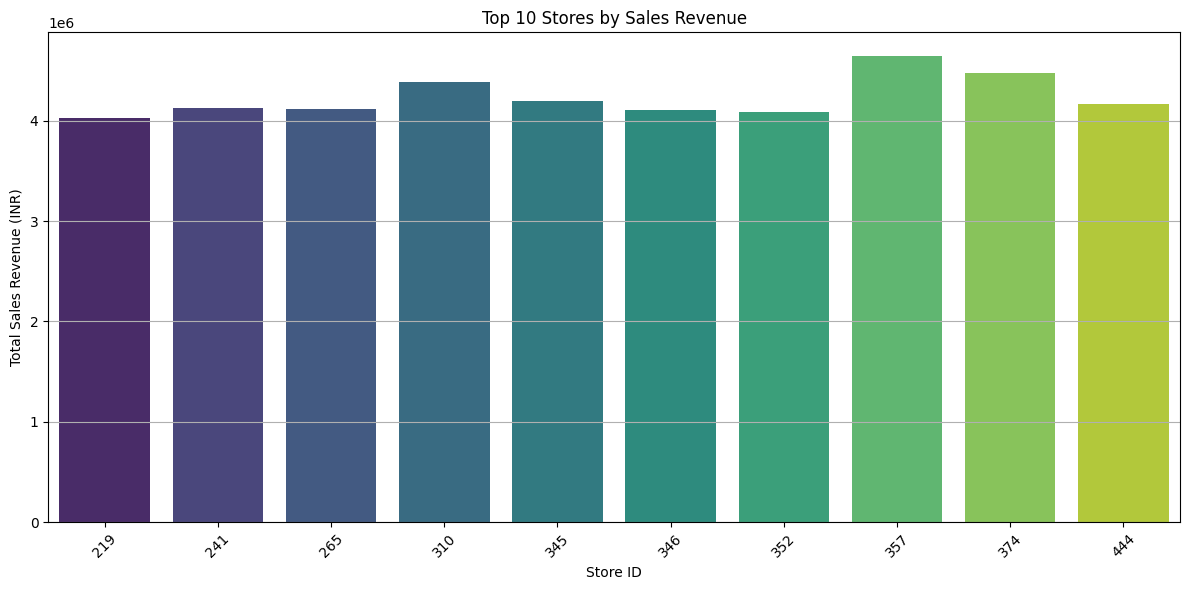

In [6]:
# Group data by store and calculate total sales for each store
store_sales = df.groupby('store_id')['sales'].sum().reset_index()

# Sort stores by total sales in descending order
store_sales_sorted = store_sales.sort_values(by='sales', ascending=False).head(10)

# Plot the total sales for each store using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='store_id', y='sales', data=store_sales_sorted, palette='viridis')
plt.title('Top 10 Stores by Sales Revenue')
plt.xlabel('Store ID')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# What is the average sales price of top 20 selling products?

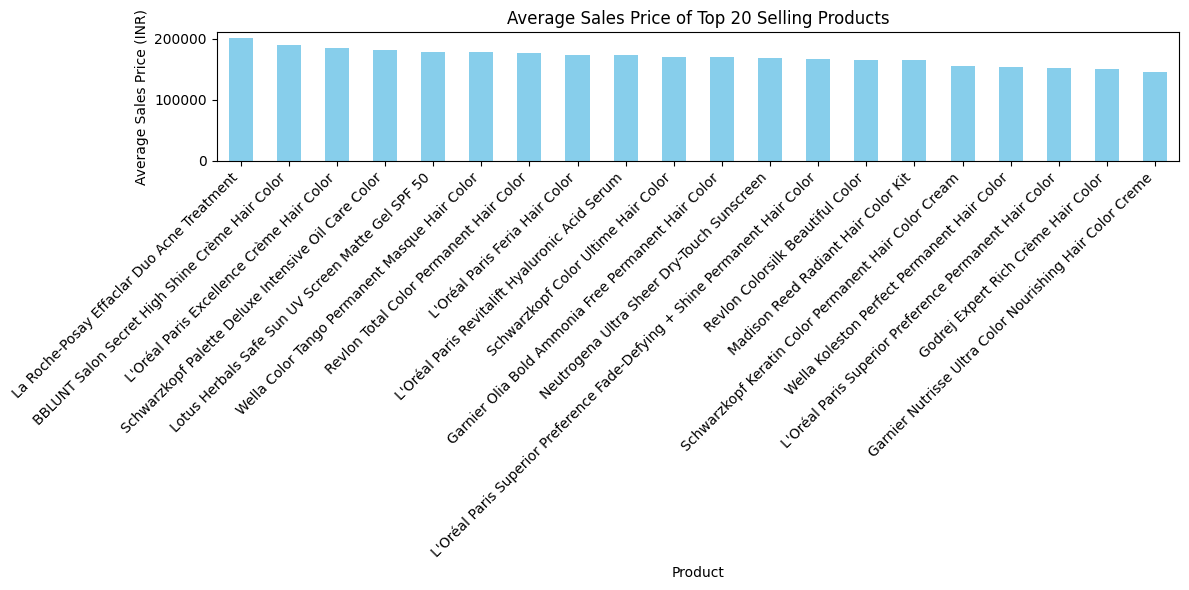

In [7]:
# Calculate total sales revenue for each product
top_sellers = df.groupby('product')['sales'].sum().sort_values(ascending=False).head(20)

# Filter the DataFrame to include only the top 20 selling products
top_20_products = df[df['product'].isin(top_sellers.index)]

# Calculate the average sales price for the top 20 selling products
avg_sales_price_top_20 = top_20_products.groupby('product')['sales'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
avg_sales_price_top_20.plot(kind='bar', color='skyblue')
plt.title('Average Sales Price of Top 20 Selling Products')
plt.xlabel('Product')
plt.ylabel('Average Sales Price (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# How effective are discounts in driving sales?

In [8]:
# Calculate total sales revenue for products with discounts
discounted_sales = df[df['discount'] > 0]['sales'].sum()

# Calculate total sales revenue for products without discounts
non_discounted_sales = df[df['discount'] == 0]['sales'].sum()

# Calculate the percentage increase in sales due to discounts
discount_effectiveness = ((discounted_sales - non_discounted_sales) / non_discounted_sales) * 100

print(f"The percentage increase in sales due to discounts is: {discount_effectiveness:.2f}%")


The percentage increase in sales due to discounts is: 206.69%


# What is the profitability of top 20 selling product?

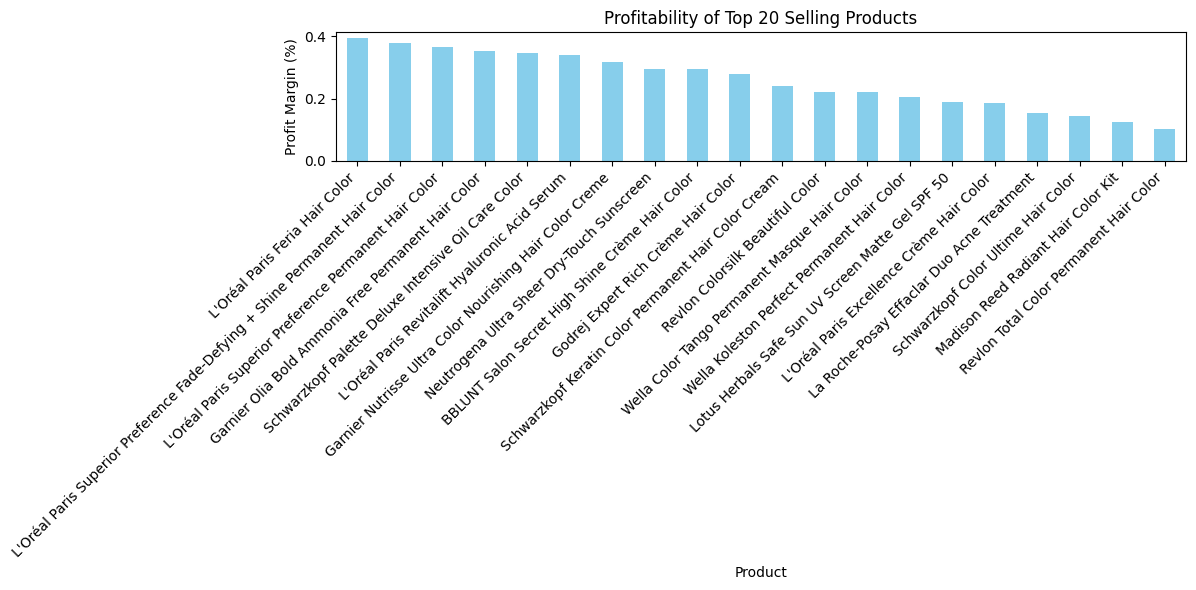

In [9]:
# Calculate profit for each product
df['profit'] = df['sales'] - df['cost_price']

# Identify the top 20 selling products by revenue
top_20_selling_products = df.groupby('product')['sales'].sum().nlargest(20).index

# Filter the dataframe to include only the top 20 selling products
top_20_df = df[df['product'].isin(top_20_selling_products)]

# Calculate profitability for each product
profitability = top_20_df.groupby('product')['profit'].sum() / top_20_df.groupby('product')['sales'].sum()

# Plot the profitability of the top 20 selling products
plt.figure(figsize=(12, 6))
profitability.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Profitability of Top 20 Selling Products')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# What is the profitability of bottom 20 selling product?

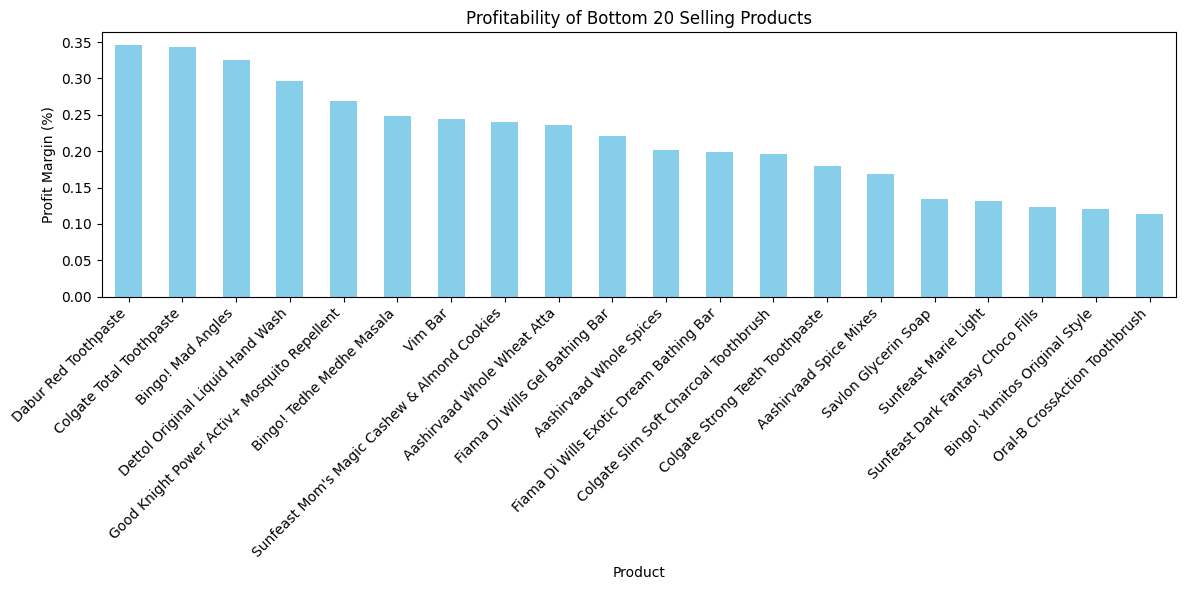

In [10]:
# Calculate profit for each product
df['profit'] = df['sales'] - df['cost_price']

# Identify the bottom 20 selling products by revenue
bottom_20_selling_products = df.groupby('product')['sales'].sum().nsmallest(20).index

# Filter the dataframe to include only the bottom 20 selling products
bottom_20_df = df[df['product'].isin(bottom_20_selling_products)]

# Calculate profitability for each product
profitability_bottom = bottom_20_df.groupby('product')['profit'].sum() / bottom_20_df.groupby('product')['sales'].sum()

# Plot the profitability of the bottom 20 selling products
plt.figure(figsize=(12, 6))
profitability_bottom.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Profitability of Bottom 20 Selling Products')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# How do sales vary across different regions?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\2936865057.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')


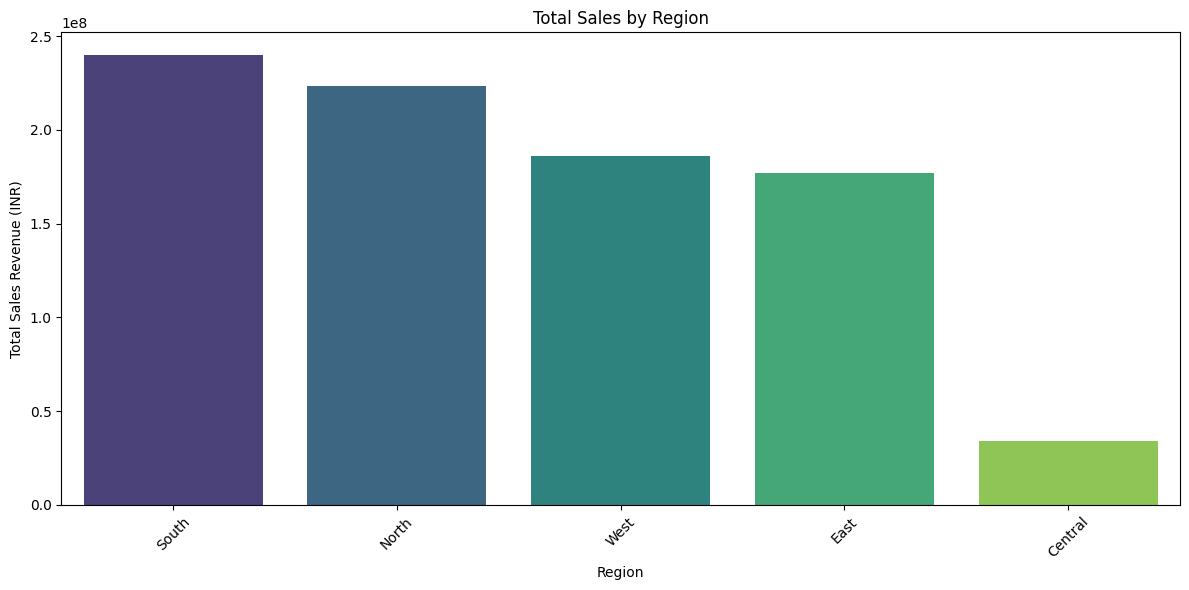

In [11]:
# Group data by region and calculate total sales for each region
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

# Plot the total sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# What is the average sales per product category?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\981951514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_category.index, y=avg_sales_category.values, palette='coolwarm')


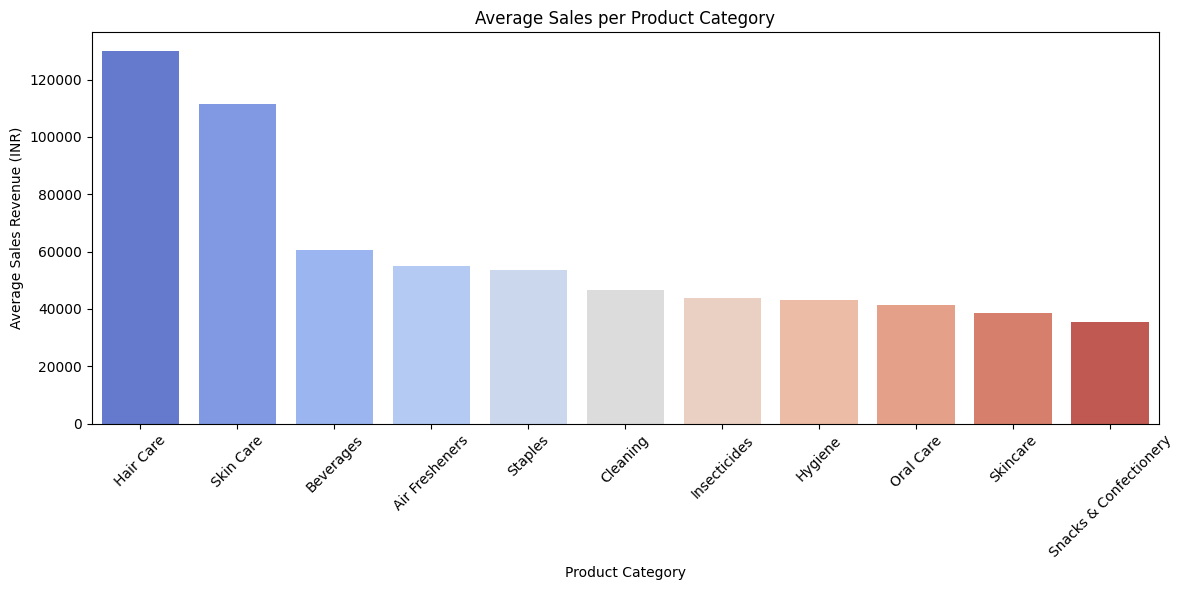

In [12]:
# Calculate average sales per product category
avg_sales_category = df.groupby('category')['sales'].mean().sort_values(ascending=False)

# Plot the average sales per product category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_category.index, y=avg_sales_category.values, palette='coolwarm')
plt.title('Average Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# How does the quantity sold vary for the top 20 selling products?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\1141404401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_sold.values, y=quantity_sold.index, palette='viridis')


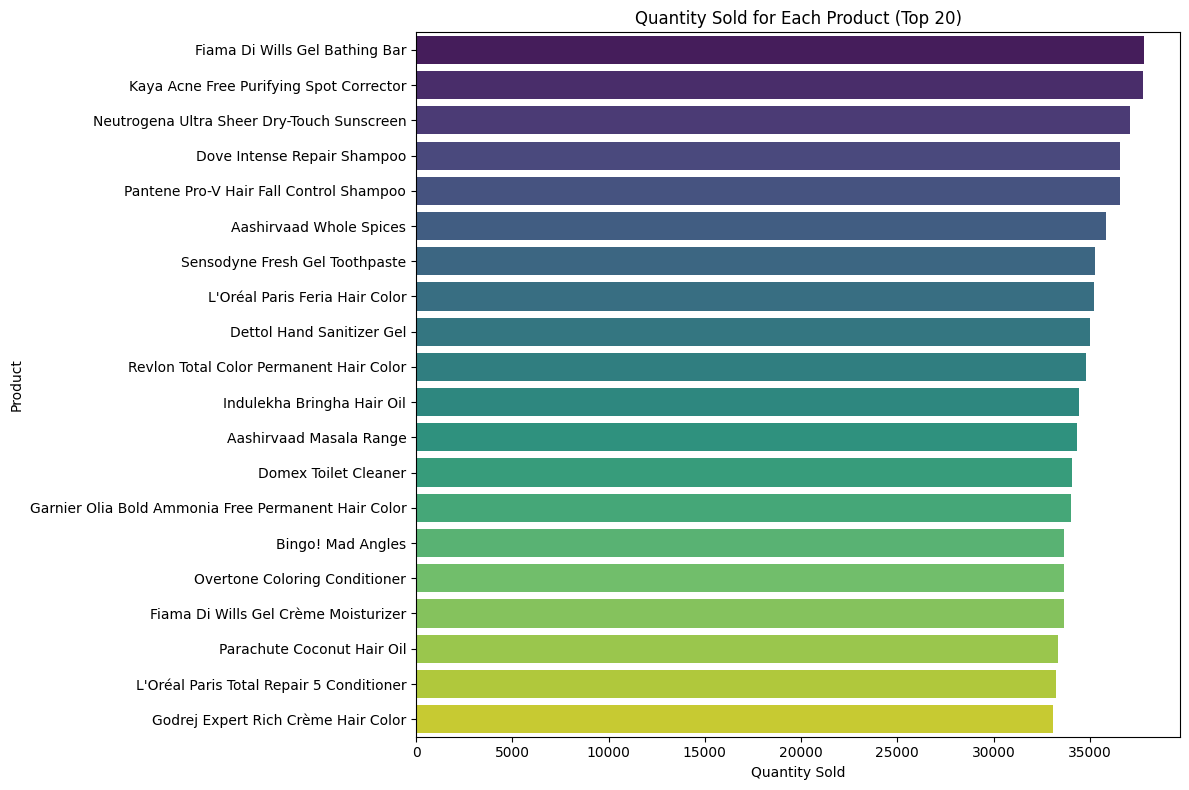

In [13]:
# Calculate total quantity sold for each product
quantity_sold = df.groupby('product')['quantity'].sum().sort_values(ascending=False).head(20)

# Plot the quantity sold for each product
plt.figure(figsize=(12, 8))
sns.barplot(x=quantity_sold.values, y=quantity_sold.index, palette='viridis')
plt.title('Quantity Sold for Each Product (Top 20)')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


# Sales KPI

## Product Sales Growth Rate: How has the sales growth rate changed from the previous period to the current period for each product category?

In [14]:
# Group the data by 'category' and 'dt_order' and calculate total sales for each category for each period
sales_by_category_period = df.groupby(['category', df['dt_order'].dt.to_period('M')])['sales'].sum().unstack()

# Calculate the sales growth rate for each category
sales_growth_rate = ((sales_by_category_period.iloc[:, -1] - sales_by_category_period.iloc[:, -2]) / sales_by_category_period.iloc[:, -2]) * 100

# Display the sales growth rate for each product category
print(sales_growth_rate)


category
Air Fresheners             32.056718
Beverages                 -63.570307
Cleaning                   -2.288535
Hair Care                   9.187941
Hygiene                   -49.258241
Insecticides              109.325641
Oral Care                  47.433926
Skin Care                  29.073654
Skincare                  -19.340889
Snacks & Confectionery    -91.185548
Staples                   -12.152524
dtype: float64


## Category Market Share: What is the market share of each product category based on sales revenue?

In [15]:
# Calculate the total sales revenue for each product category
category_sales = df.groupby('category')['sales'].sum()

# Calculate the total sales revenue across all categories
total_sales = category_sales.sum()

# Calculate the market share of each category
market_share = (category_sales / total_sales) * 100

# Display the market share of each category
print(market_share)


category
Air Fresheners             2.100371
Beverages                  2.224010
Cleaning                   4.662941
Hair Care                 57.919188
Hygiene                    3.877092
Insecticides               2.516618
Oral Care                  3.120597
Skin Care                 15.678751
Skincare                   1.540295
Snacks & Confectionery     1.965595
Staples                    4.394540
Name: sales, dtype: float64


## Profit Margin per Product: What is the profit margin for each product, calculated as the percentage of profit from the sales revenue?

In [16]:
# Calculate the profit per product
df['profit'] = df['sales'] - df['cost_price']

# Calculate the sales per product
sales_per_product = df.groupby('product')['sales'].sum()

# Calculate the cost per product
cost_per_product = df.groupby('product')['cost_price'].sum()

# Calculate the profit margin per product
profit_margin_per_product = (df.groupby('product')['profit'].sum() / sales_per_product) * 100

# Display the profit margin per product
print(profit_margin_per_product)


product
Aashirvaad Chana Dal                              18.385026
Aashirvaad Masala Range                           38.452242
Aashirvaad Rajma                                  34.594624
Aashirvaad Select Sharbati Atta                   26.235230
Aashirvaad Spice Mixes                            16.868744
                                                    ...    
WOW Skin Science Vitamin C Glow Clay Face Mask    22.493014
Wella Color Charm Demi-Permanent Hair Color       31.807670
Wella Color Charm Permanent Liquid Hair Color     10.184231
Wella Color Tango Permanent Masque Hair Color     22.171973
Wella Koleston Perfect Permanent Hair Color       20.471063
Length: 185, dtype: float64


## Customer Reach Index: How many orders were placed for each product, and what percentage of total orders does this represent?

In [17]:
# Calculate the number of orders for each product
orders_per_product = df.groupby('product')['order_id'].nunique()

# Calculate the total number of orders
total_orders = df['order_id'].nunique()

# Calculate the Customer Reach Index for each product
customer_reach_index = (orders_per_product / total_orders) * 100

# Display the Customer Reach Index for each product
print(customer_reach_index)


product
Aashirvaad Chana Dal                              0.57
Aashirvaad Masala Range                           0.67
Aashirvaad Rajma                                  0.45
Aashirvaad Select Sharbati Atta                   0.58
Aashirvaad Spice Mixes                            0.41
                                                  ... 
WOW Skin Science Vitamin C Glow Clay Face Mask    0.41
Wella Color Charm Demi-Permanent Hair Color       0.63
Wella Color Charm Permanent Liquid Hair Color     0.43
Wella Color Tango Permanent Masque Hair Color     0.52
Wella Koleston Perfect Permanent Hair Color       0.66
Name: order_id, Length: 185, dtype: float64


## Customer Acquisition Cost: How much does it cost to acquire a new customer for each product category, based on total marketing and acquisition expenses divided by the number of new customers acquired?

In [18]:
# Calculate the total marketing and acquisition expenses for each product category
total_expenses_per_category = df.groupby('category')['cost_price'].sum()  # Assuming 'cost_price' represents the total expenses

# Calculate the number of new customers acquired in each product category
new_customers_per_category = df.groupby('category')['order_id'].nunique()  # Assuming 'order_id' represents the number of orders

# Calculate the Customer Acquisition Cost (CAC) for each product category
cac_per_category = total_expenses_per_category / new_customers_per_category

# Display the Customer Acquisition Cost (CAC) for each product category
print(cac_per_category)

category
Air Fresheners            41618.844985
Beverages                 46339.363924
Cleaning                  35892.150812
Hair Care                 96750.667362
Hygiene                   32381.940492
Insecticides              33675.868952
Oral Care                 30395.882716
Skin Care                 84934.080925
Skincare                  28692.559420
Snacks & Confectionery    28595.338235
Staples                   40223.389831
dtype: float64


# Retail Sales Analysis


# Distribution of Sales by Category
The distribution of sales by category shows that the top three categories are Haircare, Skincare, and Cleaning, indicating a strong demand for personal care and household cleaning products.

# Sales Trends Over Time
Sales peaked in 2019 but experienced a significant drop in 2020, likely due to external factors such as the pandemic.

From 2020 to 2022, sales gradually increased, with 2022 being the second-highest sales year.

The analysis by month revealed that the beginning of 2019 had the highest sales, with a dip around October 2020.

# Highest Sales Revenue Stores
Store ID 357 has the highest sales revenue, followed by Store ID 374, while Store ID 219 has the lowest.

# Average Sales Price of Top 20 Selling Products
The average sales price of the top 20 selling products falls between INR 100,000 and 200,000, with "La Roche Posey Effacler Duo acne treatment" being the highest-selling product.

# Effectiveness of Discounts in Driving Sales
Discounts were highly effective, with a percentage increase in sales of 206.69% due to discounts.

# Profitability Analysis
The profitability of the top 20 selling products varied, with "Loreal Paris feria hair color" having the highest profit margin of 0.4%, and "Revlon total color permanent hair color" having the lowest profit margin.

The profitability of the bottom 20 selling products ranged from 0.10% to 0.15%, with "Oral B cross action toothbrush" having the lowest profit margin, and "Dabur Red toothpaste" having the highest profit margin.

# Sales Variation Across Regions
Total sales revenue was highest in the south region, indicating strong market demand, while the central region had the lowest sales revenue.

# Average Sales per Product Category
Haircare products had the highest average sales per product category, followed by Skincare, Beverages, and Air Fresheners. Snacks and Confectionery had the lowest average sales.

# Quantity Sold Variation for Top 20 Selling Products
"Fiama Di wills gel bathing bar" had the highest quantity sold among the top 20 selling products, while "Godrej expert rich creme hair color" had the lowest quantity sold.

# KPI Analysis
Product Sales Growth Rate: The sales growth rate varied across categories, with Insecticides showing the highest growth rate and Snacks & Confectionery showing the lowest.

Category Market Share: Hair Care had the highest market share based on sales revenue, followed by Skin Care and Cleaning.

Profit Margin per Product: The profit margin varied for each product, with Aashirvaad Masala Range having the highest profit margin.

Customer Reach Index: The percentage of total orders represented by each product varied, indicating the popularity and demand for certain products.

Customer Acquisition Cost: The cost to acquire a new customer varied across categories, with Air Fresheners having the highest cost and Snacks & Confectionery having the lowest.


Overall, the analysis provides insights into the sales performance, profitability, and market trends of the retail products, helping to inform strategic decisions and improve business outcomes.

# Product Analysis

#### Questions we are asking: 
What are the top-selling products by revenue?

What is the overall sales and monthly sales trend in 2023?

How are the categories performing by states in sales?

What is the overall profit? What is the profit by product and category?

How are the sales by population and categories?

What is the profit for the top 20 products?

#### KPI Analysis



Product Performance Index: What are the top 5 products by Product Performance Index (PPI), and how do their performance indices compare to the average performance of all products? 

Product Revenue Concentration: What is the proportion of total revenue contributed by the top 5 selling products, and how does this distribution impact overall revenue?

Product Sales Velocity: What are the top 5 products by sales velocity, and how does their sales velocity impact overall revenue and profitability?


Product Return Rate: What are the top 5 products by return rate, and how does their return rate impact overall revenue and profitability?



# What are the top-selling products by revenue?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\2112151885.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product', y='sales', data=top_15_selling_products, palette='viridis')


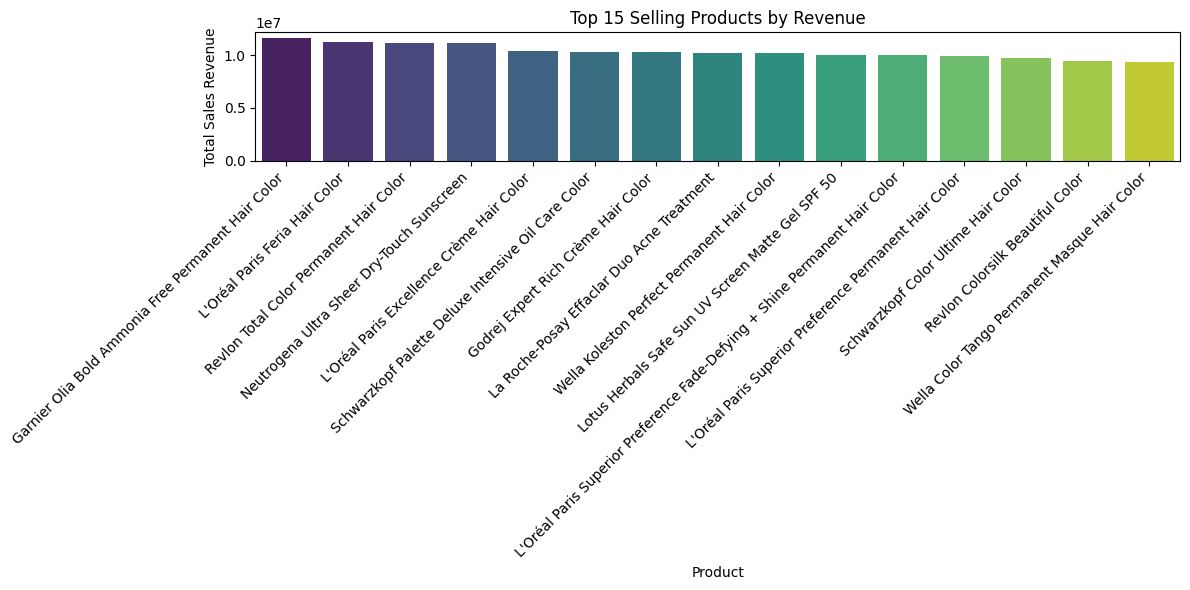

In [19]:
# Group the data by product and sum the sales revenue
top_selling_products = df.groupby('product')['sales'].sum().reset_index()

# Sort the products based on total revenue
top_selling_products = top_selling_products.sort_values(by='sales', ascending=False)

# Select the top 15 selling products
top_15_selling_products = top_selling_products.head(15)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='product', y='sales', data=top_15_selling_products, palette='viridis')
plt.title('Top 15 Selling Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# What is the overall sales and monthly sales trend in 2023?

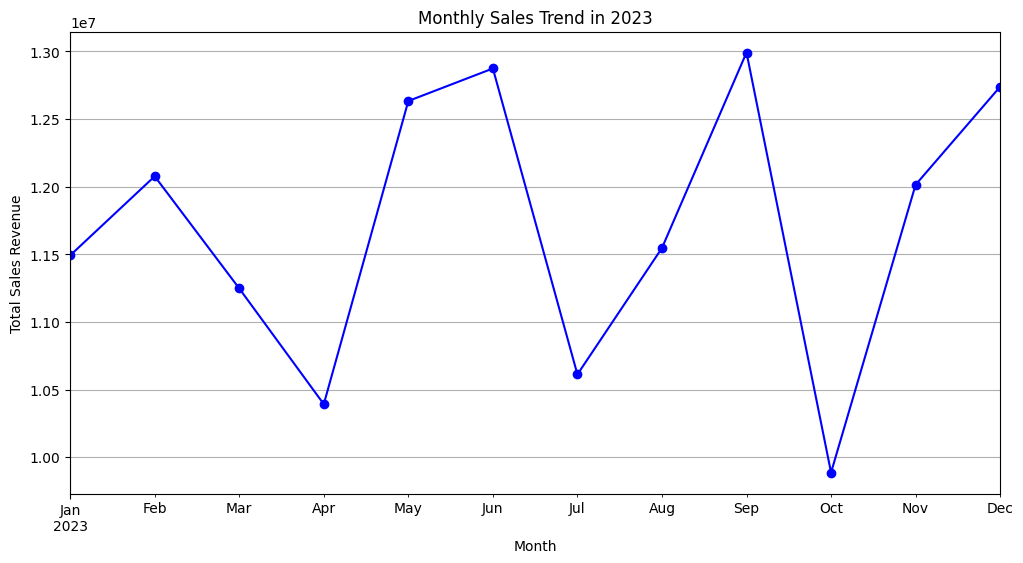

In [20]:
# Convert the 'dt_order' column to datetime format if it's not already
df['dt_order'] = pd.to_datetime(df['dt_order'])

# Filter the data for the year 2023
df_2023 = df[df['dt_order'].dt.year == 2023]

# Group the data by month and sum the sales revenue
monthly_sales_2023 = df_2023.groupby(df_2023['dt_order'].dt.to_period('M'))['sales'].sum()

# Plotting the monthly sales trend in 2023
plt.figure(figsize=(12, 6))
monthly_sales_2023.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend in 2023')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.show()


# How are the  categories performing by states in sales?

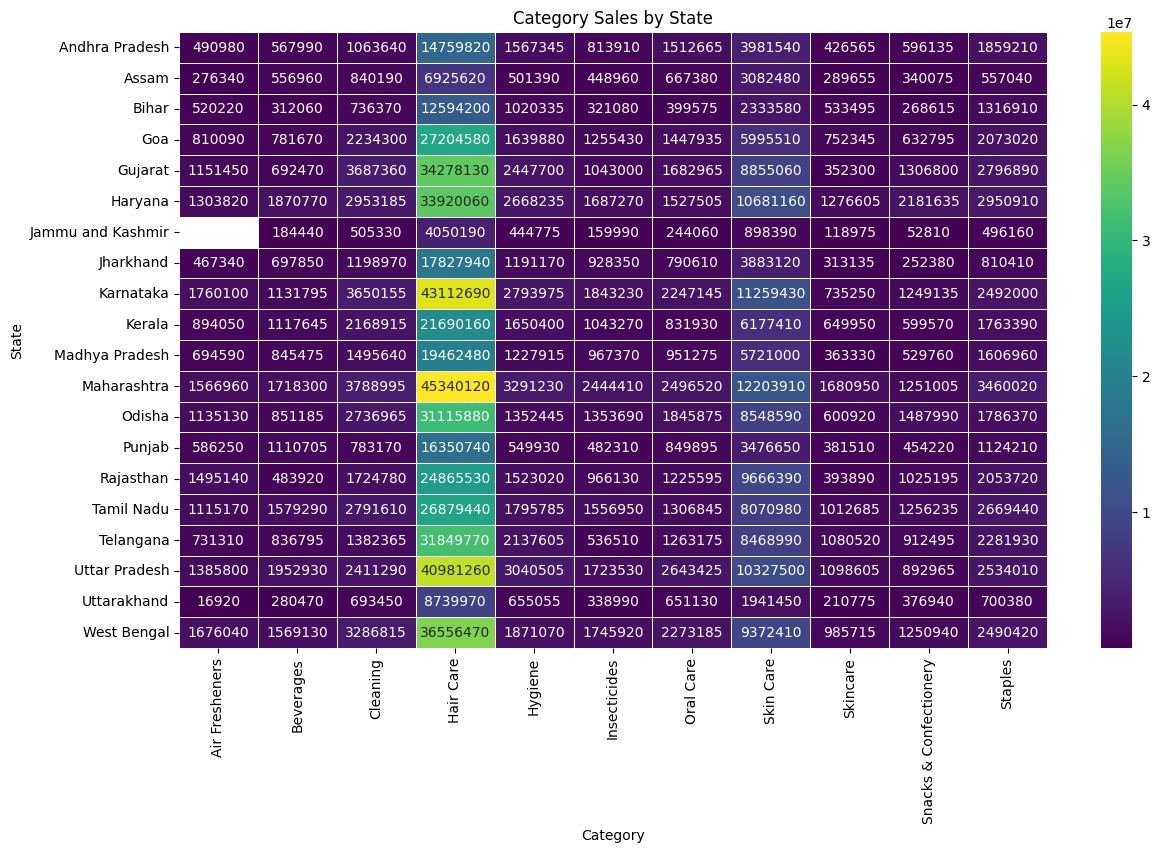

In [21]:
# Group the data by category and state and sum the sales revenue
category_state_sales = df.groupby(['category', 'state'])['sales'].sum().reset_index()

# Pivot the data to have categories as columns and states as rows
category_state_pivot = category_state_sales.pivot(index='state', columns='category', values='sales')

# Plotting the category sales by state
plt.figure(figsize=(14, 8))
sns.heatmap(category_state_pivot, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)
plt.title('Category Sales by State')
plt.xlabel('Category')
plt.ylabel('State')
plt.show()


# What is the overall profit? What is the profit by product and category?

In [22]:
# Calculate profit for each product
df['profit'] = df['sales'] - df['cost_price']

# Calculate profit by category
category_profit = df.groupby('category')['profit'].sum().reset_index()

# Calculate overall profit
overall_profit = df['profit'].sum()

print(f"Overall Profit: {overall_profit}")
print("\nProfit by Category:")
print(category_profit)


Overall Profit: 214005588

Profit by Category:
                  category     profit
0           Air Fresheners    4385100
1                Beverages    4498611
2                 Cleaning    9194461
3                Hair Care  127369490
4                  Hygiene    8338525
5             Insecticides    4957069
6                Oral Care    7162158
7                Skin Care   32090378
8                 Skincare    3358242
9   Snacks & Confectionery    3306314
10                 Staples    9345240


# How are the sales by population and categories?

In [23]:
# Group the data by population and category, and sum the sales
sales_by_population_category = df.groupby(['population', 'category'])['sales'].sum().reset_index()

# Print the result
print(sales_by_population_category)


     population                category    sales
0         72000          Air Fresheners   273910
1         72000               Beverages   156960
2         72000                Cleaning   453270
3         72000               Hair Care  6031890
4         72000                 Hygiene   483725
..          ...                     ...      ...
903    24400000               Oral Care    94460
904    24400000               Skin Care   574280
905    24400000                Skincare    37920
906    24400000  Snacks & Confectionery    68100
907    24400000                 Staples    43870

[908 rows x 3 columns]


# What is the profit for the top 20 products?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\2909439742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product', y='profit', data=top_20_profit_products, palette='viridis')


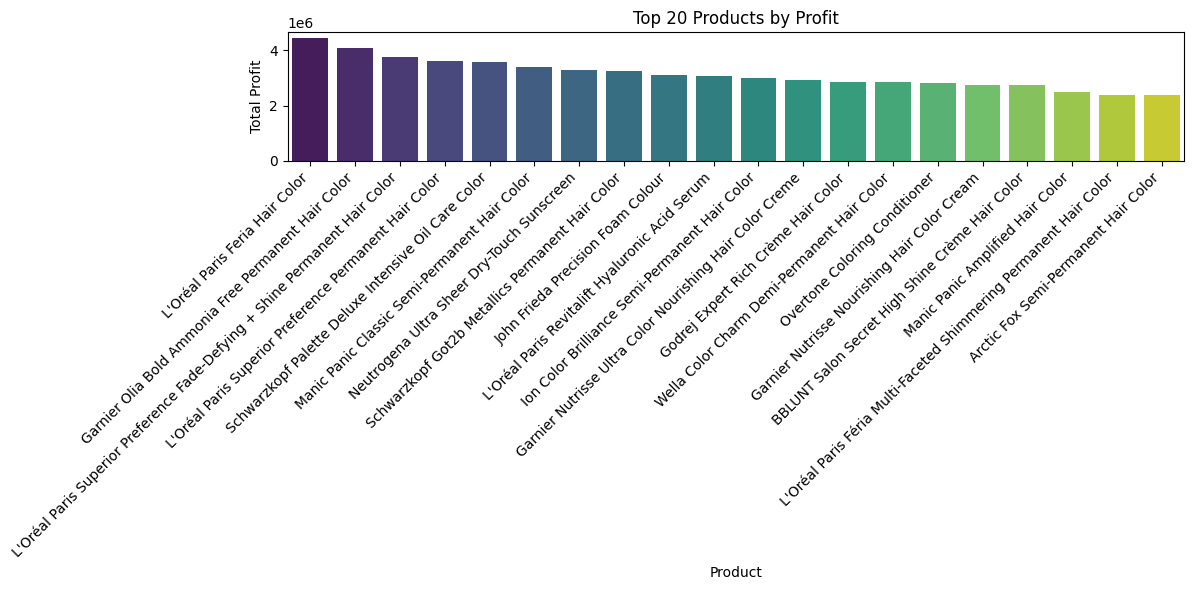

In [24]:

# Group the data by product and sum the profit
profit_by_product = df.groupby('product')['profit'].sum().reset_index()

# Sort the products based on total profit
top_20_profit_products = profit_by_product.sort_values(by='profit', ascending=False).head(20)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='product', y='profit', data=top_20_profit_products, palette='viridis')
plt.title('Top 20 Products by Profit')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Product Performance Index: What are the top 5 products by Product Performance Index (PPI), and how do their performance indices compare to the average performance of all products? 

In [25]:
total_sales = df['sales'].sum()
print("Total Sales:", total_sales)


Total Sales: 860690670


In [26]:
average_sales_all_products = df['sales'].mean()
print(average_sales_all_products)


86069.067


In [27]:
df['PPI'] = (df['sales'] / average_sales_all_products) * 100
sorted_df = df.sort_values('PPI', ascending=False)

top_20_products = sorted_df.head(20)
print(top_20_products)


      order_id   dt_order  product_id        segment   category  \
5308      5309 2020-10-21       10119  Personal Care  Skin Care   
2422      2423 2023-08-08       10131  Personal Care  Hair Care   
9802      9803 2019-09-14       10119  Personal Care  Skin Care   
6608      6609 2022-01-15       10119  Personal Care  Skin Care   
2956      2957 2023-06-05       10108  Personal Care  Skin Care   
1675      1676 2020-08-16       10108  Personal Care  Skin Care   
4046      4047 2019-08-05       10131  Personal Care  Hair Care   
7155      7156 2022-11-18       10119  Personal Care  Skin Care   
4966      4967 2020-01-22       10133  Personal Care  Hair Care   
2896      2897 2019-04-16       10133  Personal Care  Hair Care   
5133      5134 2021-02-15       10108  Personal Care  Skin Care   
4001      4002 2022-07-26       10177  Personal Care  Hair Care   
4922      4923 2021-03-21       10131  Personal Care  Hair Care   
1323      1324 2019-11-14       10131  Personal Care  Hair Car

In [28]:
total_sales = df['sales'].sum()
print("Total Sales:", total_sales)

average_sales_all_products = df['sales'].mean()
print("Average Sales:", average_sales_all_products)

# Calculate the PPI for each product
df['PPI'] = (df['sales'] / average_sales_all_products) * 100

# Sort the products by PPI in descending order
sorted_df = df.sort_values('PPI', ascending=False)

# Select the top 5 products
top_5_products = sorted_df.head(5)

# Print the top 5 products by PPI
print("Top 5 Products by Product Performance Index (PPI):")
print(top_5_products[['product', 'PPI']])


Total Sales: 860690670
Average Sales: 86069.067
Top 5 Products by Product Performance Index (PPI):
                                                product         PPI
5308         La Roche-Posay Effaclar Duo Acne Treatment  405.836861
2422          L'Oréal Paris Excellence Crème Hair Color  404.616911
9802         La Roche-Posay Effaclar Duo Acne Treatment  403.396960
6608         La Roche-Posay Effaclar Duo Acne Treatment  402.583660
2956  Lotus Herbals Safe Sun UV Screen Matte Gel SPF 50  401.770360


# Product Revenue Concentration: What is the proportion of total revenue contributed by the top 5 selling products, and how does this distribution impact overall revenue?


In [29]:
# Calculate total revenue
total_revenue = df['sales'].sum()

# Sort products by sales in descending order
sorted_products = df.groupby('product_id')['sales'].sum().sort_values(ascending=False)

# Calculate proportion of total revenue contributed by the top-selling products
top_products_revenue = sorted_products.head(5).sum()
revenue_concentration = (top_products_revenue / total_revenue) * 100

print("Proportion of total revenue contributed by the top 5 products:", revenue_concentration)


Proportion of total revenue contributed by the top 5 products: 6.445378337841166


# Product Sales Velocity: What are the top 5 products by sales velocity, and how does their sales velocity impact overall revenue and profitability?

In [30]:
# Calculate total sales for each product
total_sales = df.groupby('product')['sales'].sum()

# Calculate the average number of days between orders for each product
df['dt_order'] = pd.to_datetime(df['dt_order'])
df['order_interval'] = df.groupby('product')['dt_order'].diff().dt.days
average_order_interval = df.groupby('product')['order_interval'].mean()

# Calculate sales velocity
sales_velocity = total_sales / average_order_interval

# Get the top 5 products by sales velocity
top_5_sales_velocity = sales_velocity.nlargest(5)

print(top_5_sales_velocity)


product
Lakmé Sun Expert Ultra Matte SPF 50 PA+++ Sunscreen Lotion    6.271081e+07
Sensodyne Fresh Mint Toothpaste                               4.434900e+07
St. Ives Fresh Skin Apricot Face Scrub                        7.538800e+06
Splat Rebellious Fantasy Complete Hair Color Kit              4.650967e+06
Adore Semi-Permanent Hair Color                               3.945028e+06
dtype: float64



# Product Return Rate: What are the top 5 products by return rate, and how does their return rate impact overall revenue and profitability?

In [31]:
# Calculate return rate for each product
df['return_rate'] = df.groupby('product_id')['quantity'].transform('sum') / df.groupby('product_id')['quantity'].transform('count')

# Calculate total return rate for each product
product_return_rate = df.groupby('product_id')['return_rate'].mean().nlargest(5)
print(product_return_rate)


product_id
10122    607.741379
10102    602.071429
10113    601.500000
10147    588.191489
10022    585.047619
Name: return_rate, dtype: float64


# Product Analysis

# Top-Selling Products by Revenue
The top-selling product by revenue was Garnier Olia Bold Ammonia Free Permanent Hair Color, indicating a strong demand for hair coloring products. 

The lowest revenue among the top 15 selling products was from Wella Color Tango Permanent Masque Hair Color.

# Overall Sales and Monthly Sales Trend in 2023
There were fluctuations in sales throughout 2023, with September showing the highest total sales revenue, followed by June. April and July had the lowest sales revenue.

The overall trend in 2023 showed a mix of high and low sales months, indicating seasonal variations or other external factors influencing consumer behavior.

# Categories Performance by States in Sales
Haircare products performed well in almost all states, except Jammu and Kashmir, Uttarakhand, and Assam, where other categories showed stronger sales performance.
This analysis suggests that the demand for haircare products may vary by region, highlighting the importance of regional marketing strategies.

# Overall Profit and Profit by Product and Category
The overall profit was INR 214,005,588, indicating a profitable operation.
Hair Care was the most profitable category, followed by Skin Care and Cleaning, suggesting that these categories are key drivers of profitability.

# Sales by Population and Categories
Sales varied across population groups and categories, with different population groups showing varying preferences for product categories.
This analysis provides insights into customer behavior and preferences, which can inform targeted marketing strategies.

# Profit for the Top 20 Products
The highest profit was from Loreal Paris Feria Hair Color, indicating strong profitability for this product.

# KPI Analysis

Product Performance Index (PPI): The top 5 products by PPI were skincare and haircare products, indicating strong performance compared to the average performance of all products.

Product Revenue Concentration: The top 5 selling products contributed 6.45% of the total revenue, showing a concentrated revenue distribution.

Product Sales Velocity: The top 5 products by sales velocity were skincare and haircare products, suggesting high demand and sales efficiency for these products.

Product Return Rate: The top 5 products by return rate had return rates ranging from 585% to 607%, indicating potential issues with these products that may impact overall revenue and profitability.

Overall, the analysis provides valuable insights into product performance, profitability, and customer behavior, which can help optimize product offerings and marketing strategies to drive sales and profitability.

# Geographical Analysis


#### Questions we are asking:

What are the overall and yearly sales and profit trends?

How does sales and profit vary across different regions?

What is the detailed sales and profit analysis by state in the south region?

Which are the top 10 cities by sales in Karnataka?

Who are the top 5 categories and subcategories in the south region?

what are the sales and profit by product in south region?

#### KPI Analysis:

Sales Performance by State: What is the total sales for each state, and which states are performing well or poorly in terms of sales?

City Sales Contribution: How does the sales contribution of each city compare to the total sales, and which cities are major contributors to overall sales?

Population Group Sales Performance: How do sales vary across different population groups, and which groups contribute the most to total sales?

Discount Impact on Sales by Region: What is the impact of discounts on sales in different regions, and how effective are discounts in boosting sales?

Average Sales per Transaction by Region: What is the average sales value per transaction in each region, and how does it vary across regions?

Product Category Popularity by Region: Which product categories are most popular in each region, based on the number of units sold?

Profit Margin by Region: What is the profit margin in each region, and how does it vary across regions?

Sales Growth Rate by Population Group: What is the sales growth rate for each population group, and which groups are showing the highest growth?




# What are the overall and yearly sales and profit trends?

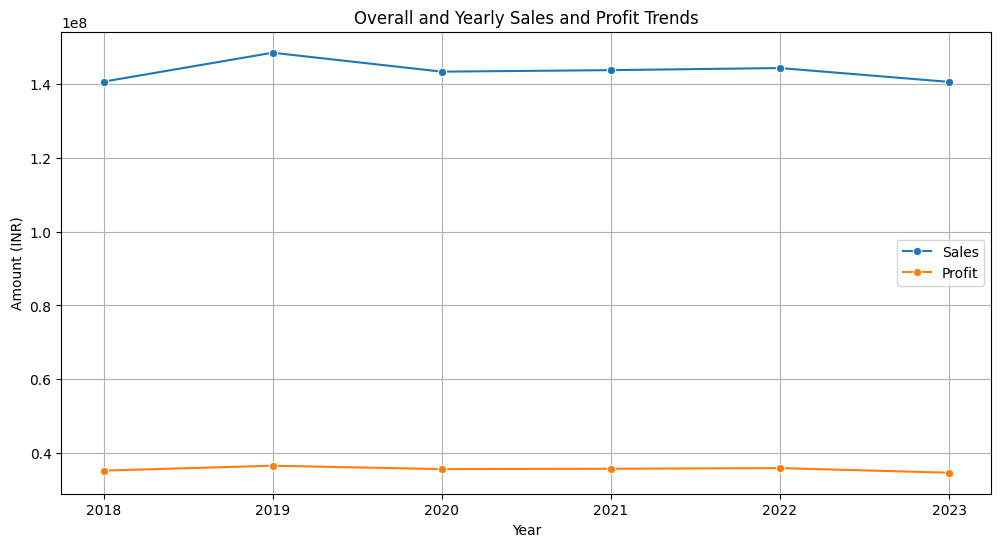

In [32]:


# Calculate total sales and profit for each year
yearly_sales = df.groupby('year')['sales'].sum().reset_index()
yearly_profit = df.groupby('year')['profit'].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='year', y='sales', marker='o', label='Sales')
sns.lineplot(data=yearly_profit, x='year', y='profit', marker='o', label='Profit')
plt.title('Overall and Yearly Sales and Profit Trends')
plt.xlabel('Year')
plt.ylabel('Amount (INR)')
plt.legend()
plt.grid(True)
plt.show()


# How does sales and profit vary across different regions?

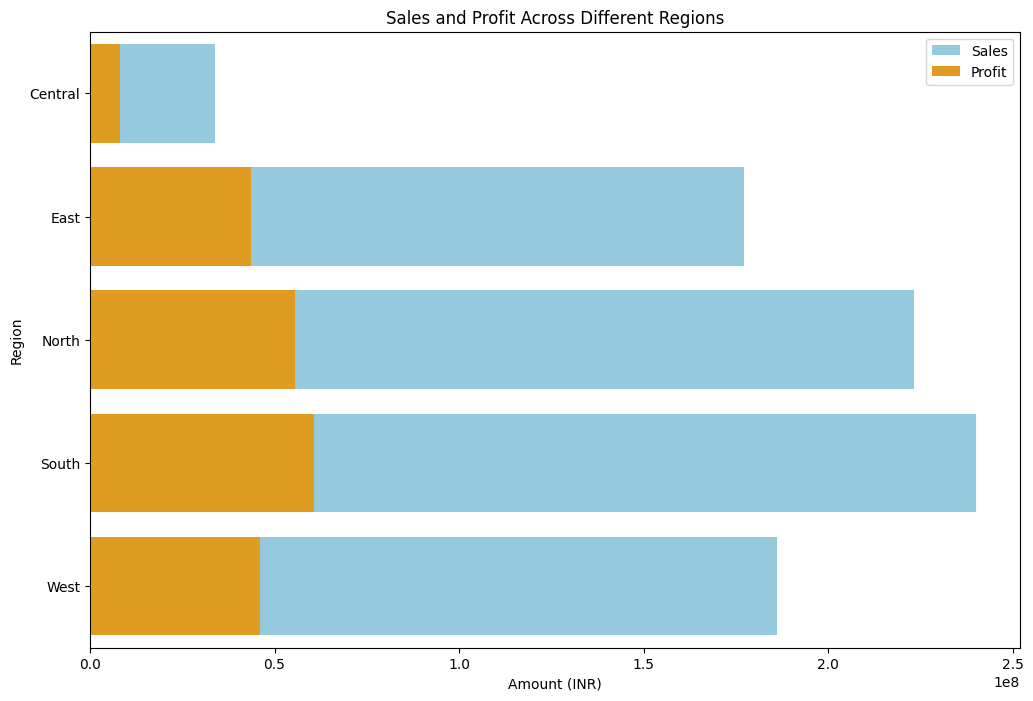

In [33]:


# Group the data by region and calculate total sales and profit for each
region_sales_profit = df.groupby('region')[['sales', 'profit']].sum().reset_index()

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='sales', y='region', data=region_sales_profit, color='skyblue', label='Sales')
sns.barplot(x='profit', y='region', data=region_sales_profit, color='orange', label='Profit')
plt.title('Sales and Profit Across Different Regions')
plt.xlabel('Amount (INR)')
plt.ylabel('Region')
plt.legend()
plt.show()


# What is the detailed sales and profit analysis by state in the south region?

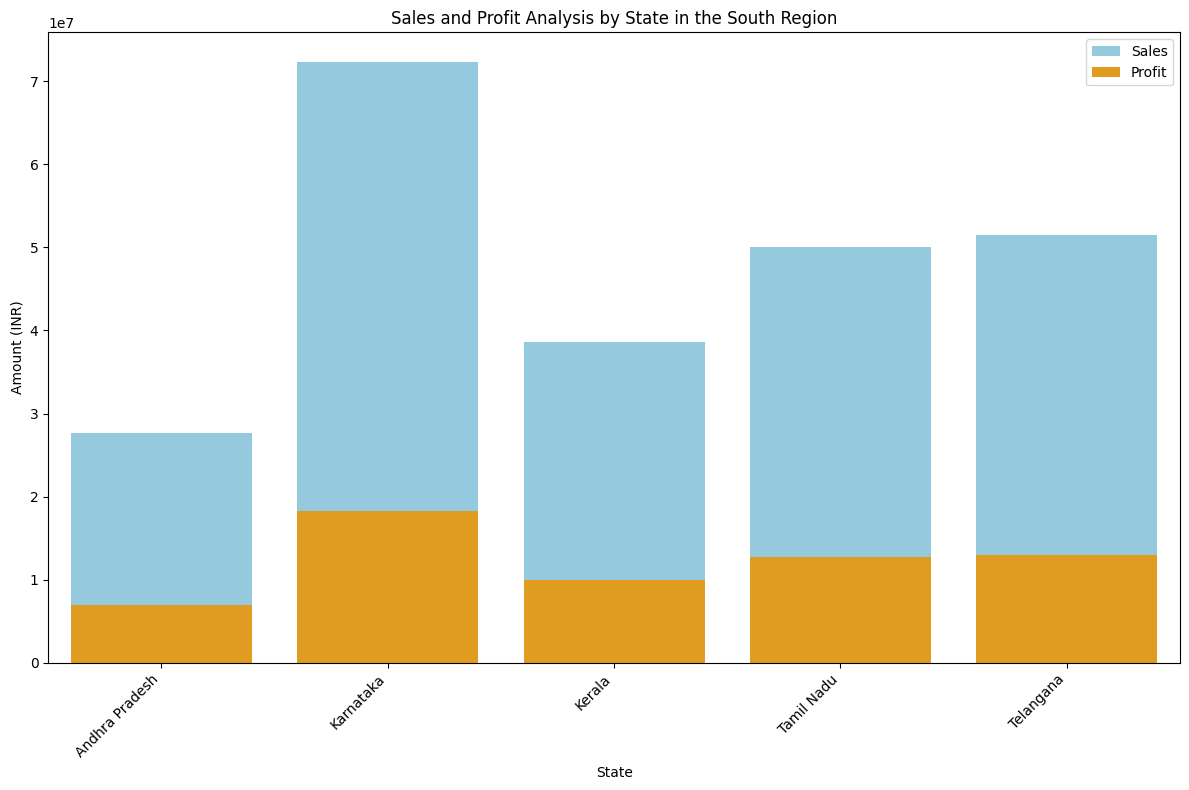

In [34]:

# Filter the data for the south region
south_region_data = df[df['region'] == 'South']

# Group the data by state and calculate total sales and profit for each
state_sales_profit = south_region_data.groupby('state')[['sales', 'profit']].sum().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='sales', data=state_sales_profit, color='skyblue', label='Sales')
sns.barplot(x='state', y='profit', data=state_sales_profit, color='orange', label='Profit')
plt.title('Sales and Profit Analysis by State in the South Region')
plt.xlabel('State')
plt.ylabel('Amount (INR)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# Which are the top 10 cities by sales in Karnataka?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\2512304741.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='viridis')


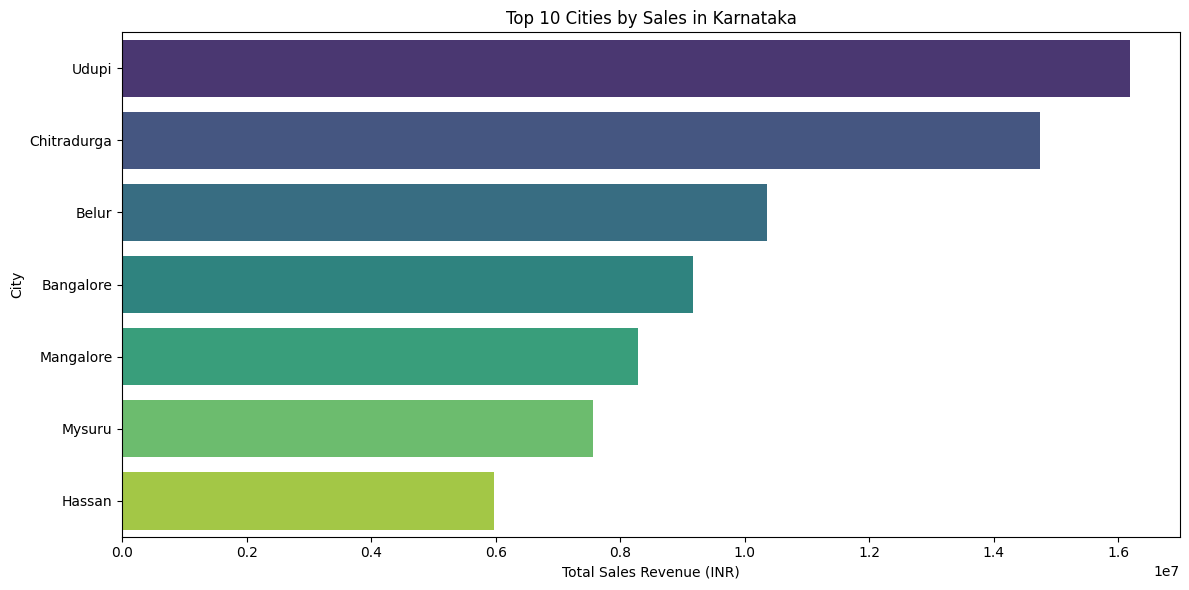

In [35]:

# Filter the data for Karnataka
karnataka_data = df[df['state'] == 'Karnataka']

# Group the data by city and calculate total sales for each city
city_sales = karnataka_data.groupby('city')['sales'].sum().sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='viridis')
plt.title('Top 10 Cities by Sales in Karnataka')
plt.xlabel('Total Sales Revenue (INR)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


# Who are the top 5 categories and subcategories in the south region?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\58201235.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sales', y='category', data=south_data[south_data['category'].isin(top_categories)],
C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\58201235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales', y='category', data=south_data[south_data['category'].isin(top_categories)],


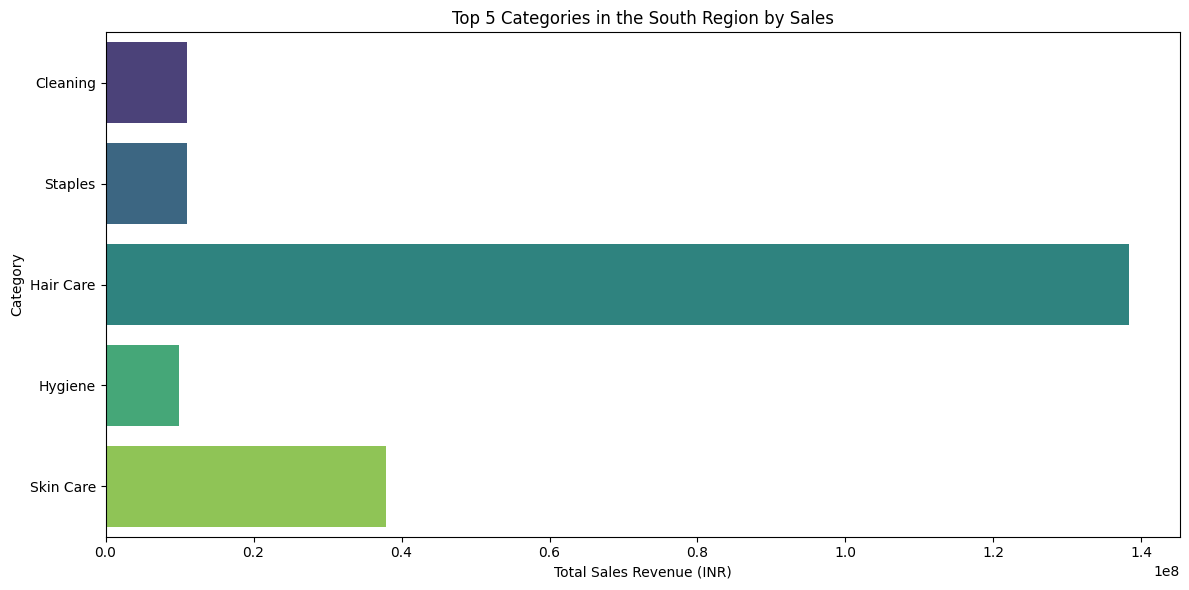

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\58201235.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sales', y='sub_category', data=south_data[south_data['sub_category'].isin(top_subcategories)],
C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\58201235.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales', y='sub_category', data=south_data[south_data['sub_category'].isin(top_subcategories)],


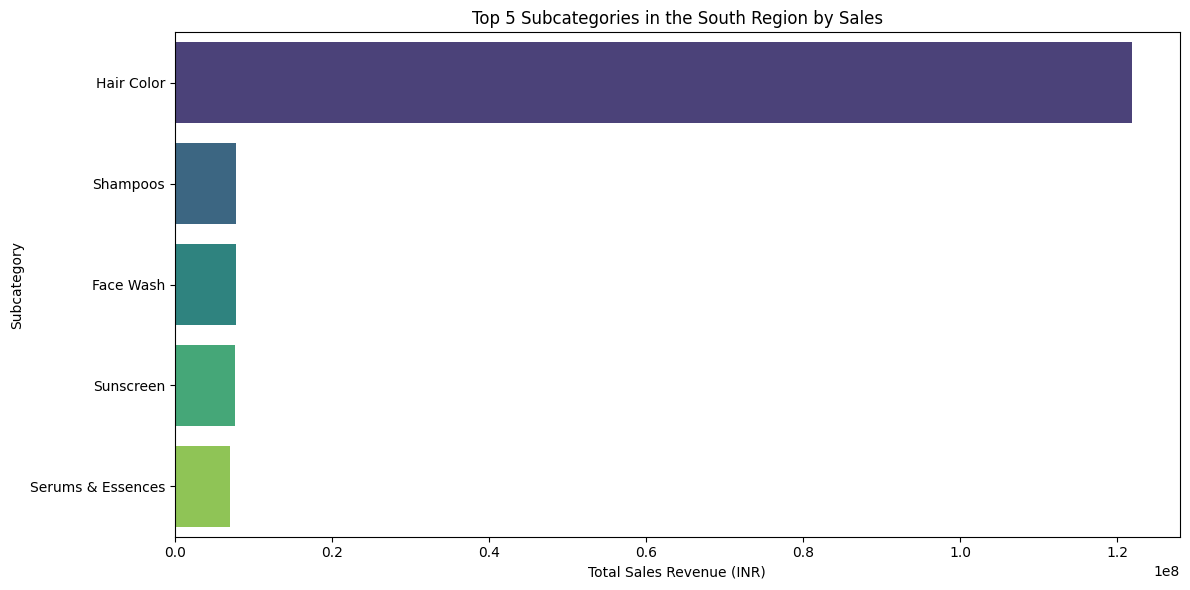

In [36]:


# Filter the data for the south region
south_data = df[df['region'] == 'South']

# Top 5 categories
top_categories = south_data.groupby('category')['sales'].sum().nlargest(5).index

# Plotting the bar chart for top categories
plt.figure(figsize=(12, 6))
sns.barplot(x='sales', y='category', data=south_data[south_data['category'].isin(top_categories)],
            estimator=sum, ci=None, palette='viridis')
plt.title('Top 5 Categories in the South Region by Sales')
plt.xlabel('Total Sales Revenue (INR)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Top 5 subcategories
top_subcategories = south_data.groupby('sub_category')['sales'].sum().nlargest(5).index

# Plotting the bar chart for top subcategories
plt.figure(figsize=(12, 6))
sns.barplot(x='sales', y='sub_category', data=south_data[south_data['sub_category'].isin(top_subcategories)],
            estimator=sum, ci=None, palette='viridis')
plt.title('Top 5 Subcategories in the South Region by Sales')
plt.xlabel('Total Sales Revenue (INR)')
plt.ylabel('Subcategory')
plt.tight_layout()
plt.show()


# What are the sales and profit by product in south region?

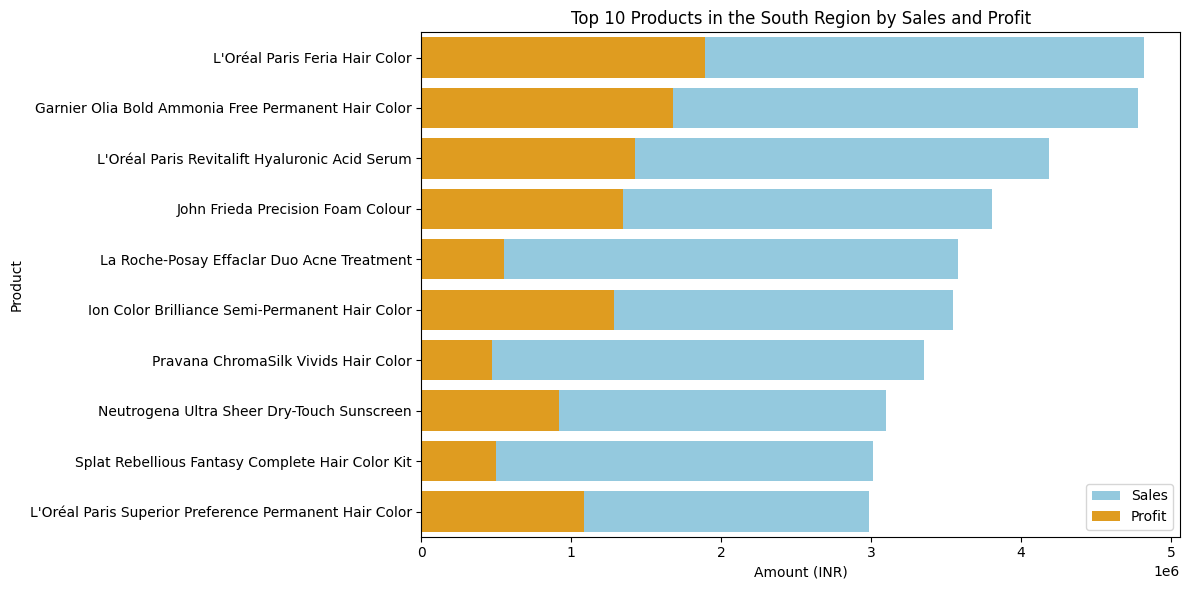

In [37]:


# Filter the data for the south region
south_data = df[df['region'] == 'South']

# Group the data by product and calculate sales and profit
product_sales_profit = south_data.groupby('product')[['sales', 'profit']].sum().reset_index()

# Sort the products by total sales
product_sales_profit = product_sales_profit.sort_values(by='sales', ascending=False)

# Plotting the bar chart for sales and profit by product
plt.figure(figsize=(12, 6))
sns.barplot(x='sales', y='product', data=product_sales_profit.head(10), color='skyblue', label='Sales')
sns.barplot(x='profit', y='product', data=product_sales_profit.head(10), color='orange', label='Profit')
plt.title('Top 10 Products in the South Region by Sales and Profit')
plt.xlabel('Amount (INR)')
plt.ylabel('Product')
plt.legend()
plt.tight_layout()
plt.show()


# Sales Performance by State: What is the total sales for each state, and which states are performing well or poorly in terms of sales?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\3206508313.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette='coolwarm')


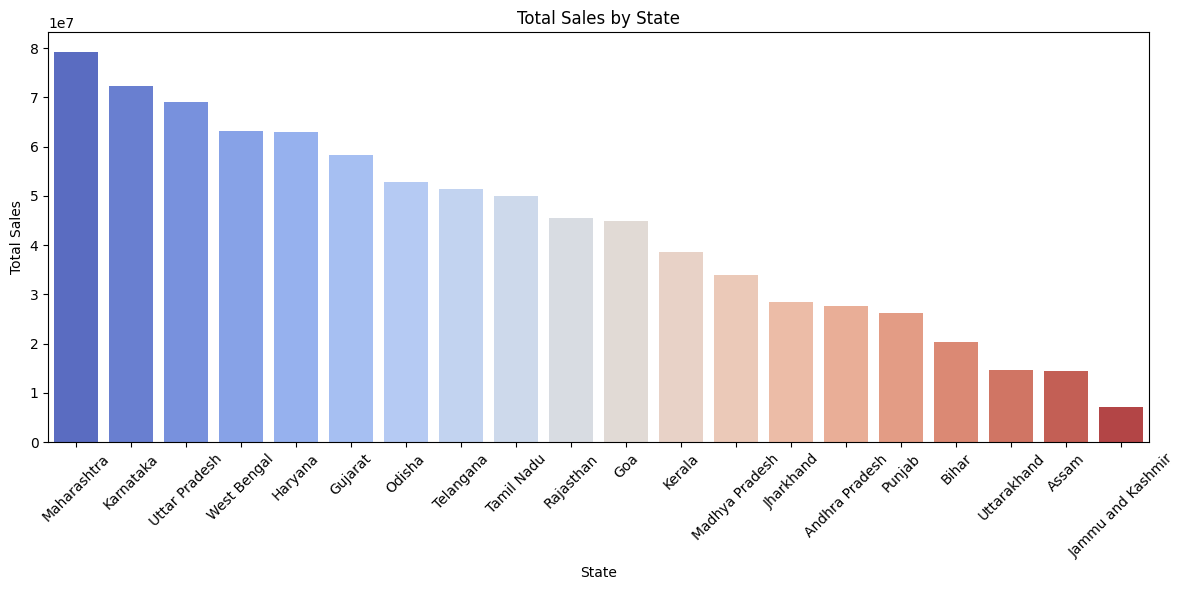

Top Performing States:
state
Maharashtra      79242420
Karnataka        72274905
Uttar Pradesh    68991820
West Bengal      63078115
Haryana          63021155
Name: sales, dtype: int64

Bottom Performing States:
state
Punjab               26149590
Bihar                20356440
Uttarakhand          14605530
Assam                14486090
Jammu and Kashmir     7155120
Name: sales, dtype: int64


In [38]:
# Group the data by state and calculate total sales for each state
state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False)

# Plot the total sales for each state
plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index, y=state_sales.values, palette='coolwarm')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify the top and bottom performing states
top_states = state_sales.head(5)
bottom_states = state_sales.tail(5)

print("Top Performing States:")
print(top_states)

print("\nBottom Performing States:")
print(bottom_states)


# City Sales Contribution: How does the sales contribution of each city compare to the total sales, and which cities are major contributors to overall sales?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\2793192044.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales_contribution.index, y=city_sales_contribution.values, palette='coolwarm')


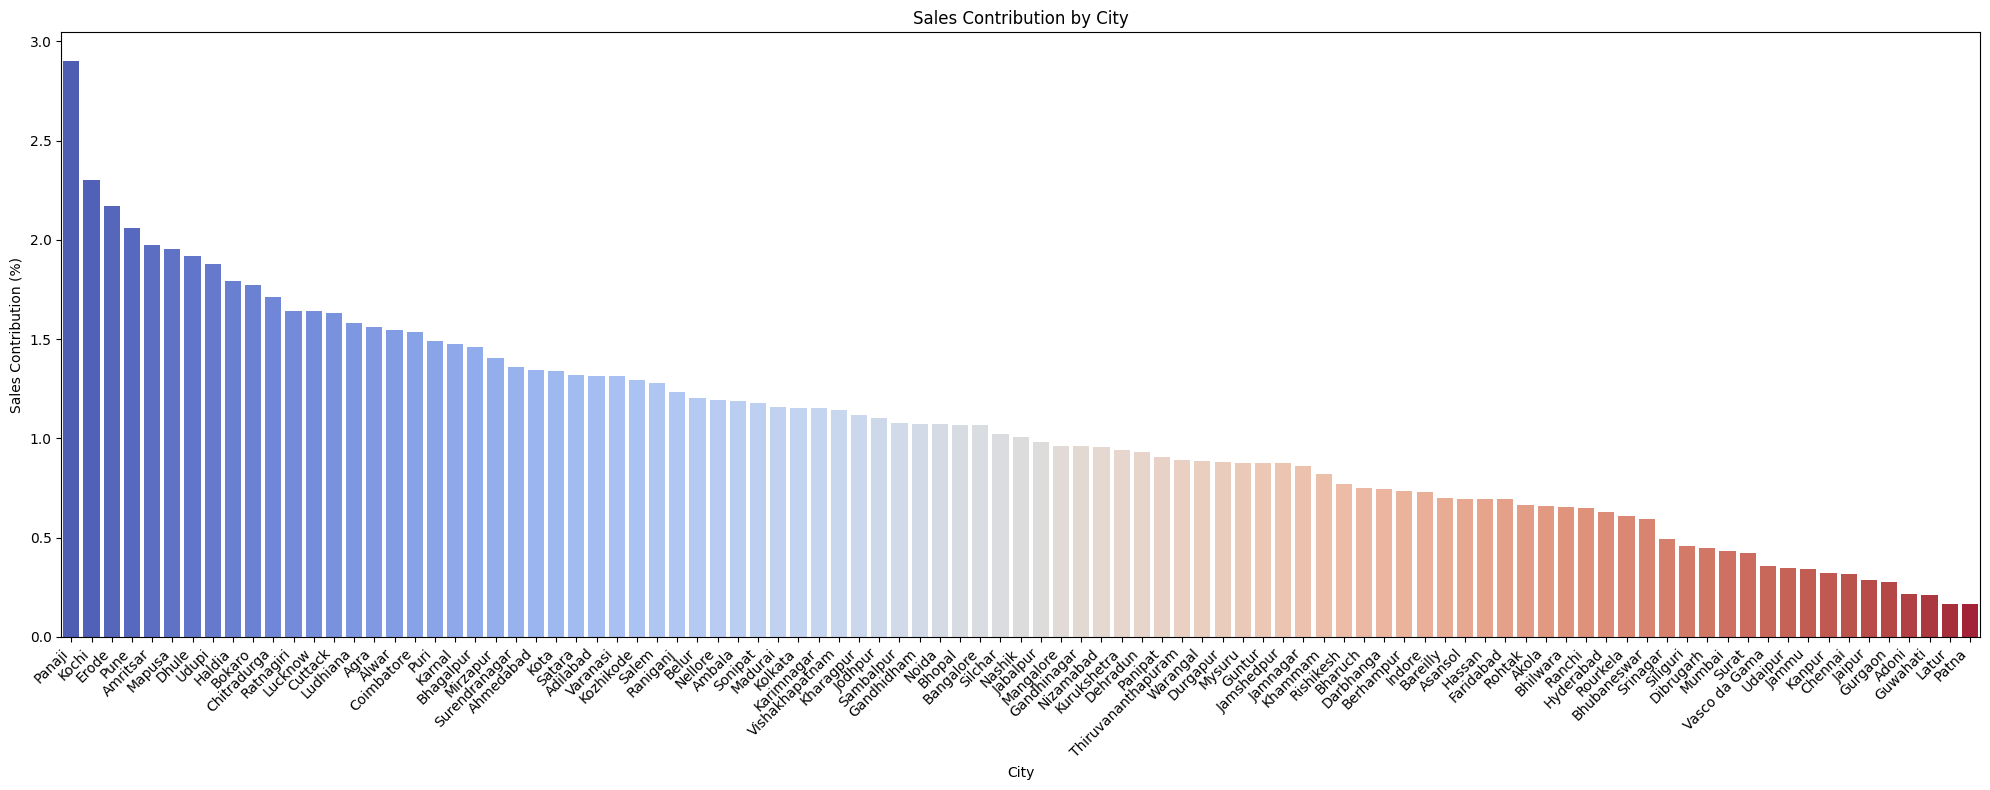

Major Contributors to Overall Sales:
city
Panaji            2.900526
Kochi             2.300468
Erode             2.170483
Pune              2.060451
Amritsar          1.971977
Mapusa            1.952410
Dhule             1.916898
Udupi             1.880414
Haldia            1.792812
Bokaro            1.772237
Chitradurga       1.712759
Ratnagiri         1.642509
Lucknow           1.639931
Cuttack           1.633396
Ludhiana          1.579426
Agra              1.561125
Alwar             1.545750
Coimbatore        1.533831
Puri              1.491918
Karnal            1.477269
Bhagalpur         1.458260
Mirzapur          1.406830
Surendranagar     1.361998
Ahmedabad         1.343350
Kota              1.339825
Satara            1.319099
Adilabad          1.315882
Varanasi          1.313748
Kozhikode         1.291689
Salem             1.279015
Raniganj          1.232131
Belur             1.204163
Nellore           1.192937
Ambala            1.187299
Sonipat           1.176115
Madurai      

In [39]:
# Group the data by city and calculate total sales for each city
city_sales = df.groupby('city')['sales'].sum().sort_values(ascending=False)

# Calculate the sales contribution of each city
total_sales = df['sales'].sum()
city_sales_contribution = (city_sales / total_sales) * 100

# Plot the sales contribution of each city
plt.figure(figsize=(20, 8))  # Increase figure size
sns.barplot(x=city_sales_contribution.index, y=city_sales_contribution.values, palette='coolwarm')
plt.title('Sales Contribution by City')
plt.xlabel('City')
plt.ylabel('Sales Contribution (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

# Identify the major contributors to overall sales
major_contributors = city_sales_contribution[city_sales_contribution >= 1]  # Assuming cities contributing >= 1% are major contributors

print("Major Contributors to Overall Sales:")
print(major_contributors)





#  Population Group Sales Performance: How do sales vary across different population groups, and which groups contribute the most to total sales?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\1325497472.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=population_group_sales_contribution.index, y=population_group_sales_contribution.values, palette='coolwarm')


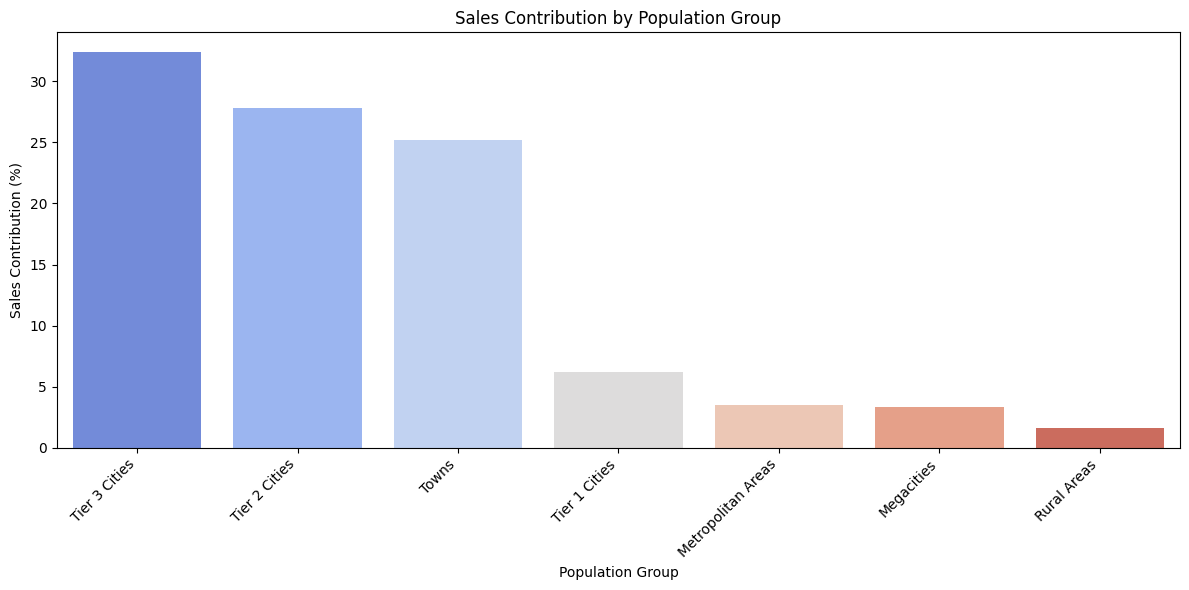

Major Contributors to Overall Sales:
population_group
Tier 3 Cities         32.387838
Tier 2 Cities         27.800323
Towns                 25.198773
Tier 1 Cities          6.163996
Metropolitan Areas     3.506514
Megacities             3.300047
Rural Areas            1.642509
Name: sales, dtype: float64


In [40]:
# Group the data by population group and calculate total sales for each group
population_group_sales = df.groupby('population_group')['sales'].sum().sort_values(ascending=False)

# Calculate the sales contribution of each population group
total_sales = df['sales'].sum()
population_group_sales_contribution = (population_group_sales / total_sales) * 100

# Plot the sales contribution of each population group
plt.figure(figsize=(12, 6))
sns.barplot(x=population_group_sales_contribution.index, y=population_group_sales_contribution.values, palette='coolwarm')
plt.title('Sales Contribution by Population Group')
plt.xlabel('Population Group')
plt.ylabel('Sales Contribution (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

# Identify the population groups contributing the most to overall sales
major_contributors = population_group_sales_contribution[population_group_sales_contribution >= 1]  # Assuming groups contributing >= 1% are major contributors

print("Major Contributors to Overall Sales:")
print(major_contributors)


# Discount Impact on Sales by Region: What is the impact of discounts on sales in different regions, and how effective are discounts in boosting sales?

Discount Impact on Sales: 206.68946930772455


C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\3787070995.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='discount_impact', data=region_sales, palette='coolwarm')


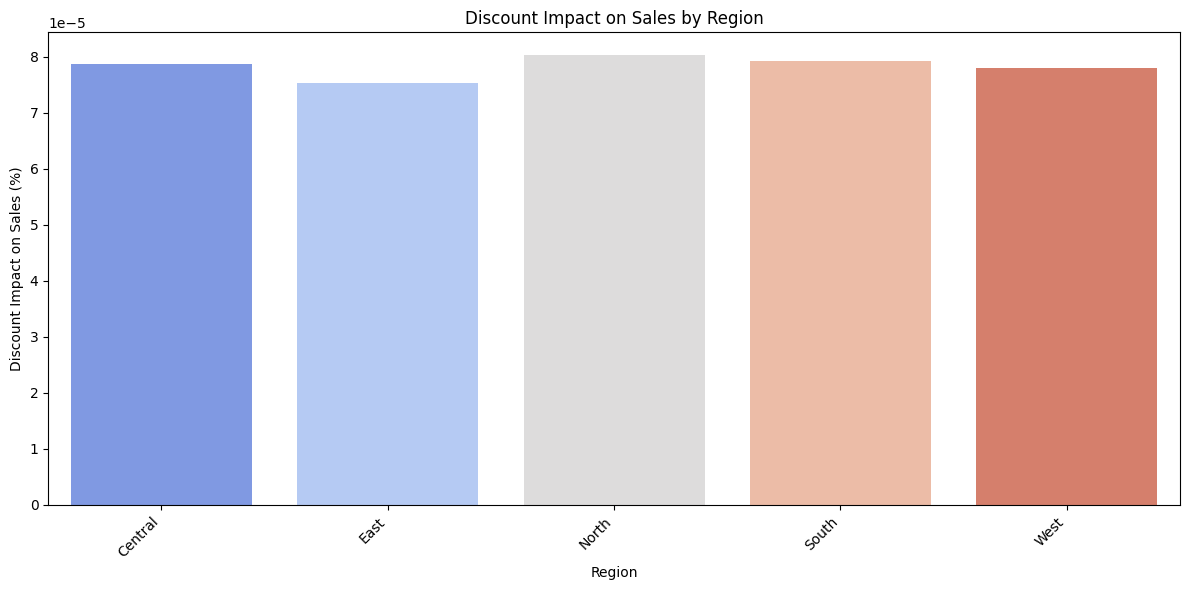

In [41]:
# Filter the data for sales with and without discounts
sales_with_discount = df[df['discount'] > 0]['sales'].sum()
sales_without_discount = df[df['discount'] == 0]['sales'].sum()

# Calculate the discount impact on sales
discount_impact = ((sales_with_discount - sales_without_discount) / sales_without_discount) * 100

# Print the discount impact
print("Discount Impact on Sales:", discount_impact)

# Group the data by region and calculate total sales with and without discounts for each region
region_sales = df.groupby('region').agg({'sales': 'sum', 'discount': 'sum'})
region_sales['sales_without_discount'] = region_sales['sales'] - region_sales['discount']
region_sales = region_sales.reset_index()

# Calculate the discount impact on sales for each region
region_sales['discount_impact'] = ((region_sales['sales'] - region_sales['sales_without_discount']) / region_sales['sales_without_discount']) * 100

# Plot the discount impact on sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='discount_impact', data=region_sales, palette='coolwarm')
plt.title('Discount Impact on Sales by Region')
plt.xlabel('Region')
plt.ylabel('Discount Impact on Sales (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()


# Average Sales per Transaction by Region: What is the average sales value per transaction in each region, and how does it vary across regions?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\2669928731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sales', data=avg_sales_per_transaction, palette='coolwarm')


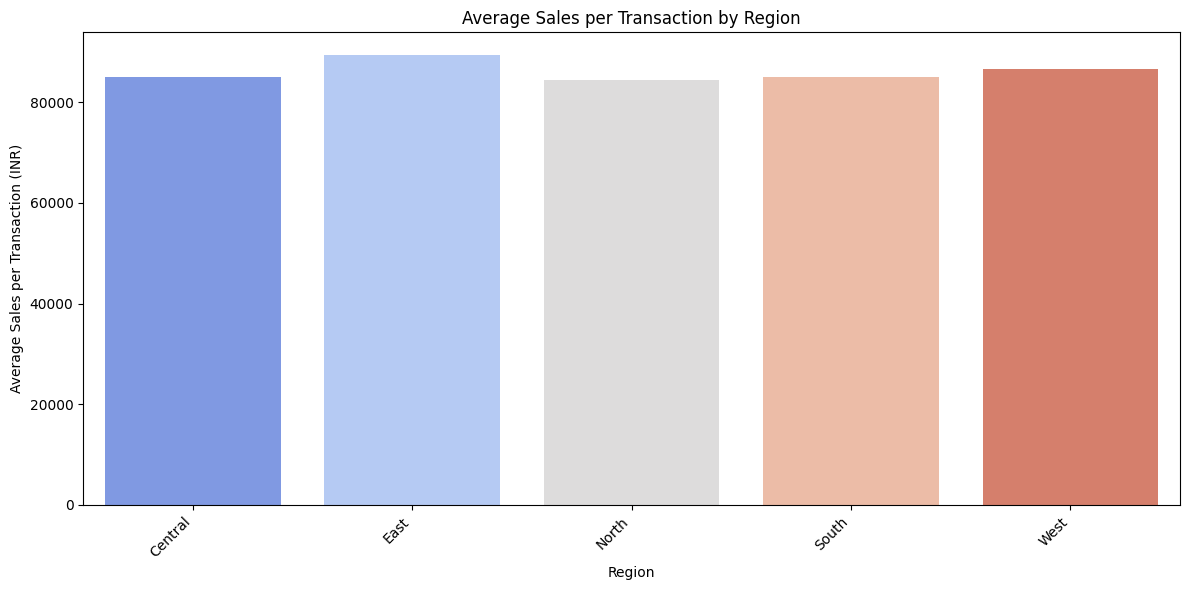

In [42]:
# Group the data by region and calculate the average sales per transaction
avg_sales_per_transaction = df.groupby('region')['sales'].mean().reset_index()

# Plot the average sales per transaction by region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='sales', data=avg_sales_per_transaction, palette='coolwarm')
plt.title('Average Sales per Transaction by Region')
plt.xlabel('Region')
plt.ylabel('Average Sales per Transaction (INR)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()


# Product Category Popularity by Region: Which product categories are most popular in each region, based on the number of units sold?

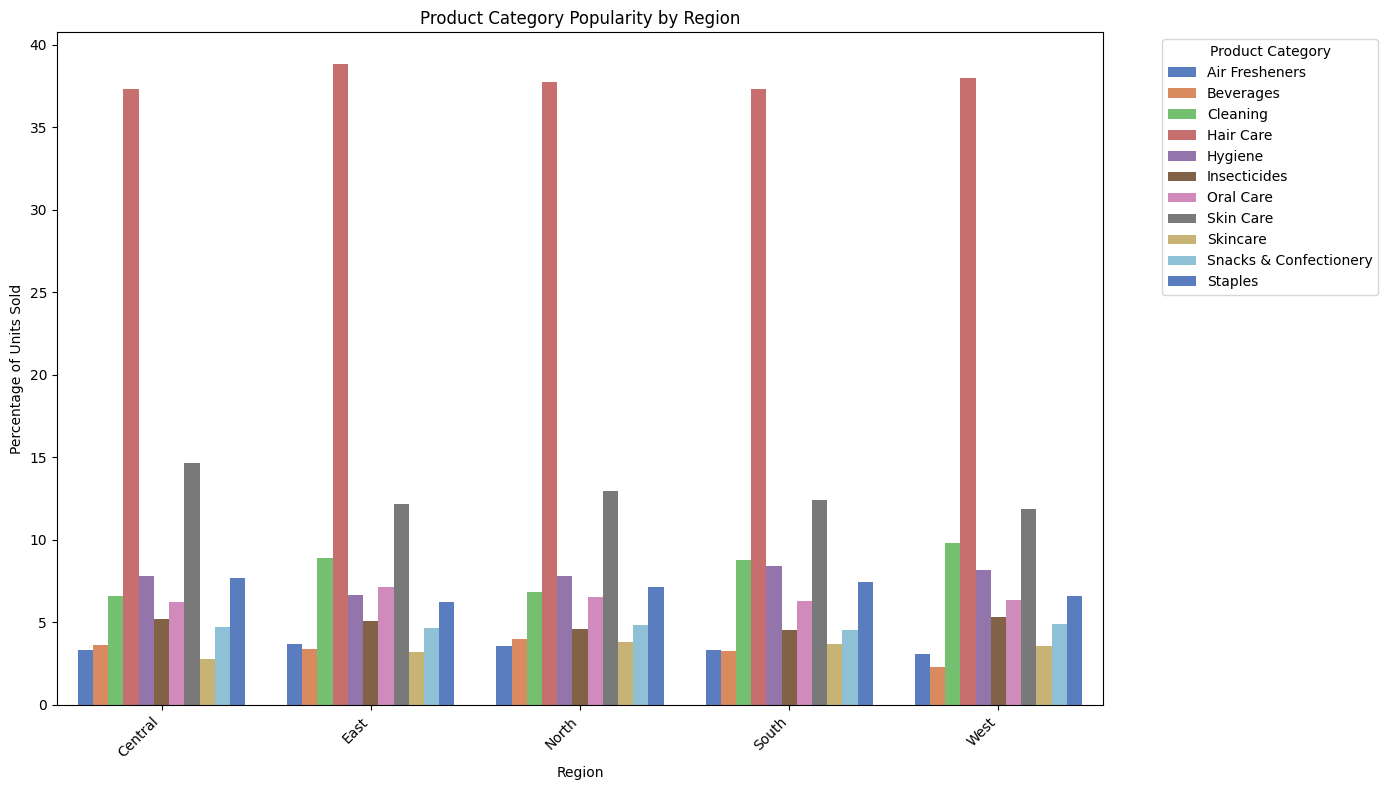

In [43]:
# Group the data by region and product category and calculate the total units sold for each category in each region
category_units_sold = df.groupby(['region', 'category'])['quantity'].sum().reset_index()

# Calculate the total units sold in each region
total_units_sold = df.groupby('region')['quantity'].sum().reset_index()

# Merge the two dataframes to calculate the percentage of units sold for each category in each region
category_units_sold = category_units_sold.merge(total_units_sold, on='region', suffixes=('', '_total'))

# Calculate the percentage of units sold for each category in each region
category_units_sold['percentage_sold'] = (category_units_sold['quantity'] / category_units_sold['quantity_total']) * 100

# Plot the product category popularity by region
plt.figure(figsize=(14, 8))
sns.barplot(x='region', y='percentage_sold', hue='category', data=category_units_sold, palette='muted')
plt.title('Product Category Popularity by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Units Sold')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()


# Profit Margin by Region: What is the profit margin in each region, and how does it vary across regions?

C:\Users\Qazi Fabia Hoq\AppData\Local\Temp\ipykernel_10336\2596257388.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='profit_margin', data=region_profit_sales, palette='viridis')


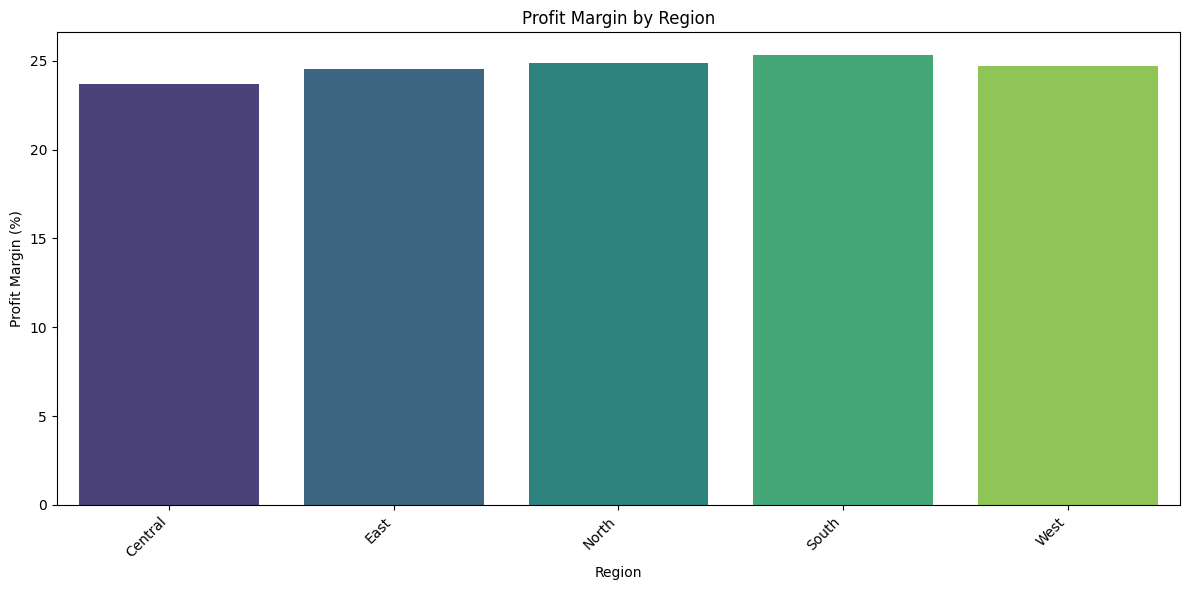

In [44]:
# Group the data by region and calculate the total profit and total sales for each region
region_profit_sales = df.groupby('region').agg({'profit': 'sum', 'sales': 'sum'}).reset_index()

# Calculate the profit margin for each region
region_profit_sales['profit_margin'] = (region_profit_sales['profit'] / region_profit_sales['sales']) * 100

# Plot the profit margin by region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='profit_margin', data=region_profit_sales, palette='viridis')
plt.title('Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()


# Sales Growth Rate by Population Group: What is the sales growth rate for each population group, and which groups are showing the highest growth?

In [48]:


# Convert 'dt_order' to datetime format
df['dt_order'] = pd.to_datetime(df['dt_order'])

# Extract the year from 'dt_order'
df['year'] = df['dt_order'].dt.year

# Group the data by 'population_group' and 'year' to get total sales for each group in each year
grouped_sales = df.groupby(['population_group', 'year'])['sales'].sum().reset_index()

# Sort the data by 'population_group' and 'year'
grouped_sales = grouped_sales.sort_values(by=['population_group', 'year'])

# Calculate the previous year's sales for each group
grouped_sales['previous_year_sales'] = grouped_sales.groupby('population_group')['sales'].shift()

# Calculate the sales growth rate for each group
grouped_sales['sales_growth_rate'] = ((grouped_sales['sales'] - grouped_sales['previous_year_sales']) / grouped_sales['previous_year_sales']) * 100

# Display the result
print(grouped_sales)


      population_group  year     sales  previous_year_sales  sales_growth_rate
0           Megacities  2018   5894835                  NaN                NaN
1           Megacities  2019   5704820            5894835.0          -3.223415
2           Megacities  2020   3397305            5704820.0         -40.448515
3           Megacities  2021   5421450            3397305.0          59.580903
4           Megacities  2022   4775020            5421450.0         -11.923563
5           Megacities  2023   3209765            4775020.0         -32.780072
6   Metropolitan Areas  2018   4252455                  NaN                NaN
7   Metropolitan Areas  2019   4805265            4252455.0          12.999785
8   Metropolitan Areas  2020   5776625            4805265.0          20.214494
9   Metropolitan Areas  2021   4617590            5776625.0         -20.064224
10  Metropolitan Areas  2022   3717605            4617590.0         -19.490362
11  Metropolitan Areas  2023   7010695            37

# Geographical Analysis

# Overall and Yearly Sales and Profit Trends
Sales were higher in 2019 but decreased in 2020, indicating a possible impact of external factors on consumer spending.

Similarly, profit followed a similar trend, with higher profits in 2019 and lower profits in 2020.

# Sales and Profit Variation Across Different Regions
In India, the South region had the highest sales, followed by the North, West, East, and Central regions.

Profitability also followed a similar pattern, with the South region leading in profitability.

# Detailed Sales and Profit Analysis by State in the South Region
Karnataka showed the highest sales and profit in the South region, followed by Telangana, Tamil Nadu, and Kerala.

Andhra Pradesh had the lowest sales and profit in the South region.

# Top 10 Cities by Sales in Karnataka
Udupi was the city with the highest sales in Karnataka, indicating a strong demand for products in that region.

# Top 5 Categories and Subcategories in the South Region

## Categories:

Haircare
Skincare
Cleaning
Staples
Hygiene

## Subcategories:

Hair Color
Shampoo
Facewash
Sunscreen
Serums & Essences

# Sales and Profit by Product in the South Region
The top three products by sales and profit in the South region were Loreal Paris Feria Hair Color, Garnier Olia Bold Ammonia Free Permanent Hair Color, and Loreal Paris Revitalift Hyaluronic Acid Serum, indicating strong demand for these products.

# KPI Analysis

Sales Performance by State: Maharashtra, Karnataka, and Uttar Pradesh were the top-performing states in terms of sales, while Punjab, Bihar, Uttarakhand, Assam, and Jammu and Kashmir were among the lowest-performing states.

City Sales Contribution: Cities like Panaji, Kochi, and Erode were major contributors to overall sales, indicating high demand in these cities.

Population Group Sales Performance: Tier 3 Cities, Tier 2 Cities, and Towns were the major contributors to sales, highlighting their importance in driving overall revenue.

Discount Impact on Sales by Region: The North region had the highest impact of discounts on sales, indicating that discounts are effective in boosting sales in this region.

Average Sales per Transaction by Region: The East region had the highest average sales per transaction, indicating higher purchasing power or larger order sizes in that region.

Product Category Popularity by Region: Haircare products were the most popular in all regions, suggesting a consistent demand for these products across the country.

Profit Margin by Region: The South region had the highest profit margin, indicating higher profitability compared to other regions.

Sales Growth Rate by Population Group: Tier 3 Cities and Towns showed the highest sales growth rate, indicating potential growth opportunities in these areas.

Overall, this analysis provides valuable insights into sales and profit trends, regional performance, and category popularity, which can be used to optimize marketing strategies and product offerings to drive sales and profitability.




